## Initialization

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" ## "all"
%matplotlib inline
##inline  
## qt
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2, glob, pickle, sys, os , pprint, winsound 

print(' Current working dir: ', os.getcwd())

from datetime import datetime, time
from classes.videopipeline import VideoPipeline
from main import main, project_overrides, challenge_overrides, harder_challenge_overrides
from common.utils import display_one, display_two
from classes.videofile import VideoFile
from common.plots import *

pp = pprint.PrettyPrinter(indent=2, width=100)

try:
    user_paths = os.environ['PYTHONPATH'].split(os.pathsep)
except KeyError:
    user_paths = []

if '.' not in sys.path:
    print("appending '.' to sys.path")
    sys.path.append('.')

sampleVideos = glob.glob('./test_videos/*.mp4')
print()
print(' Idx    Video Filename: ')
print(' ---    -------------------- ')
for i,fn in enumerate(sampleVideos):
    print(' ' , i, '  ', fn)
# print(datetime.now().strftime("%m-%d-%Y @ %H:%M:%S"))    

 Current working dir:  E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
pipeline.py: appending '..' to sys.path
 Loading line.py - cwd: E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
 Loading utils.py - cwd: E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
 Loading pipeline.py - cwd: E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
Current working dir:  E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
appending '.' to sys.path
 main.py module - name is  main

 Idx    Video Filename: 
 ---    -------------------- 
  0    ./test_videos\challenge_video.mp4
  1    ./test_videos\harder_challenge_video.mp4
  2    ./test_videos\project_video.mp4


##  Create Pipeline - Project Video

In [2]:
# print(inVideo.currFrameNum, inVideo.fromFrame, inVideo.toFrame)

# Pipeline.HISTORY
# np_format = {}
# np_format['float'] = lambda x: "%12.6f" % x
# np_format['int']   = lambda x: "%10d" % x
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =100, formatter = np_format)

In [3]:
#--adjusted for Project video -------------=
# grad_x_thr = (70,100)
# grad_y_thr = (80,155)
# mag_thr    = (90,160)
# sat_thr    = (90,255)
# grad_x_thr = (30,110)
# grad_y_thr = (30,110)
# mag_thr    = (65,255)
# sat_thr    = (130,255)

In [4]:
VIDEO_INPUT = sampleVideos[2]
OUTPUT_PATH = './output_videos_test'
 
SUFFIX      = datetime.now().strftime("%Y%m%d_%H%M")
print(SUFFIX)
FROM_FRAME  = 0; TO_FRAME    = 9999
try: 
    del Pipeline
except:
    pass

pipeline_parms = {
'mode':                       1,
'history':                    8,
'RoI_x_adj':                 30,

## specfic settings for project video -----------
'y_src_top':                480,
'y_src_bot':                690,
'displayRegionTop':         480,
'displayRegionBot':         690,
'lowlight_threshold':      'cmb_rgb_lvl_sat',

'rgb_mean_threshold':       175,
'init_window_search_margin': 65,
'window_search_margin':      65,
'poly_search_margin':        50,
'pixel_ratio_threshold':     30,
'offcntr_roi_threshold':     80
}

Pipeline    = main(input_file = VIDEO_INPUT, output_path = OUTPUT_PATH, from_frame = FROM_FRAME, to_frame = TO_FRAME, 
                   overrides = 'project', suffix = SUFFIX, **pipeline_parms)

Pipeline.display_thresholds()

 Loading pipeline.py - cwd: E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
20201006_1006
--> main routine started at: 10-06-2020 @ 10:06:19
 Suffix:  20201006_1006
 kwargs:  {'mode': 1, 'history': 8, 'RoI_x_adj': 30, 'y_src_top': 480, 'y_src_bot': 690, 'displayRegionTop': 480, 'displayRegionBot': 690, 'lowlight_threshold': 'cmb_rgb_lvl_sat', 'rgb_mean_threshold': 175, 'init_window_search_margin': 65, 'window_search_margin': 65, 'poly_search_margin': 50, 'pixel_ratio_threshold': 30, 'offcntr_roi_threshold': 80}
     Input File is   : ./test_videos\project_video.mp4

 Camera calibration file loaded ...

 Camera Calibration Matrix :
 ---------------------------
[[ 1157.778183     0.000000   667.113857]
 [    0.000000  1152.822174   386.124583]
 [    0.000000     0.000000     1.000000]]
 y_src_bot:  690  displayRegionBot :  690
self.x_src_top_left:  595.8028424436823    top_x_disp:  74
 poly degree =  2
 poly degree =  2
 Pipeline initialization complete...

 -----------------

##  Create Pipeline - Challenge Video

In [7]:
##----------------------------------------------------------                       
## challenge video 
##----------------------------------------------------------
#                         mode                  =   2,
#                         normal_threshold      = 'cmb_rgb_lvl_sat',
#                         lowlight_threshold    = 'cmb_rgb_lvl_sat_mag',
#                         rgb_mean_threshold    = 120,         
#                         window_search_margin  =  65,                       
#                         poly_search_margin    =  60,
#                         pixel_ratio_threshold =  30,
#                         offcntr_roi_threshold =  150

In [2]:
VIDEO_INPUT = sampleVideos[0]    ## challenge_video.mp4
OUTPUT_PATH = './output_videos_test'
SUFFIX      = datetime.now().strftime("%Y%m%d_%H%M")
print(SUFFIX)
FROM_FRAME  = 0; TO_FRAME    = 9999

try: 
    del Pipeline
except:
    pass

pipeline_parms = {
'mode'                     :   1,
'history'                  :   8,
'compute_history'          :   8,     ## '2' for harder_challenge_video
'min_poly_degree'          :   1,
'RoI_x_adj'                :  30,     ## Default   25
    
'y_src_top'                : 480,     ## default  480
'y_src_bot'                : 700,     ## default  720
'displayRegionTop'         : 500,     ## default  480
'displayRegionBot'         : 700,     ## default  720
    
'min_x_spread'             :  50,
'min_y_spread'             : 250,
    
'high_rgb_threshold'       : 205,
'med_rgb_threshold'        : 170,
'low_rgb_threshold'        : 120,
'vlow_rgb_threshold'       :  90,

'xhigh_sat_threshold'      : 125,
'high_sat_threshold'       :  65,
'low_sat_threshold'        :  30 , 

'xhigh_thresholding'       : 'cmb_rgb_lvl_sat',
'high_thresholding'        : 'cmb_rgb_lvl_sat',
'normal_thresholding'      : 'cmb_rgb_lvl_sat',
'low_thresholding'         : 'cmb_rgb_lvl_sat',
'vlow_thresholding'        : 'cmb_rgb_lvl_sat_mag',

'hisat_thresholding'       : 'cmb_mag_x', 
'lowsat_thresholding'      : 'cmb_rgb_lvl_sat_mag',    
    
'window_search_margin'     :  48,  ## 40,     ## default   65 <- 55
'poly_search_margin'       :  45,  ## 40,     ## default   50 <- 45 
'off_center_roi_threshold' :  50,  ## default   60 - original  80 
    
'lane_ratio_threshold'     :  2.0,
'lane_ratio_low_threshold' :  8.0,
'lane_ratio_high_threshold': 75.0,
# 'image_ratio_threshold'    :   30,
'rse_threshold'            :   80, ## Changed from 120 to 80 3-10-20 
'lane_count_threshold'     : 1300  ## changed from 3000    

}

Pipeline    = main(input_file = VIDEO_INPUT, output_path = OUTPUT_PATH, from_frame = FROM_FRAME, to_frame = TO_FRAME, 
                   overrides = 'challenge', suffix = SUFFIX, **pipeline_parms)

Pipeline.display_thresholds()

20200917_1516
--> main routine started at: 09-17-2020 @ 15:16:04
 Suffix:  20200917_1516
 kwargs:  {'mode': 1, 'history': 8, 'compute_history': 8, 'min_poly_degree': 1, 'RoI_x_adj': 30, 'y_src_top': 480, 'y_src_bot': 700, 'displayRegionTop': 500, 'displayRegionBot': 700, 'min_x_spread': 50, 'min_y_spread': 250, 'high_rgb_threshold': 205, 'med_rgb_threshold': 170, 'low_rgb_threshold': 120, 'vlow_rgb_threshold': 90, 'xhigh_sat_threshold': 125, 'high_sat_threshold': 65, 'low_sat_threshold': 30, 'xhigh_thresholding': 'cmb_rgb_lvl_sat', 'high_thresholding': 'cmb_rgb_lvl_sat', 'normal_thresholding': 'cmb_rgb_lvl_sat', 'low_thresholding': 'cmb_rgb_lvl_sat', 'vlow_thresholding': 'cmb_rgb_lvl_sat_mag', 'hisat_thresholding': 'cmb_mag_x', 'lowsat_thresholding': 'cmb_rgb_lvl_sat_mag', 'window_search_margin': 48, 'poly_search_margin': 45, 'off_center_roi_threshold': 50, 'lane_ratio_threshold': 2.0, 'lane_ratio_low_threshold': 8.0, 'lane_ratio_high_threshold': 75.0, 'rse_threshold': 80, 'lane_count_

In [6]:
# Pipeline.thresholdMethods[1]['med']    =  'cmb_rgb_lvl_sat'   
# Pipeline.ImageThresholds[1]['med']['dir_thr']    = (45 , 65)
# Pipeline.thresholds_to_str()
# print()
# Pipeline.display_thresholds()

## Instantiate Pipeline - Harder Challenge Video

In [10]:
VIDEO_INPUT = sampleVideos[1]    ## challenge_video.mp4
OUTPUT_PATH = './output_videos_test'
SUFFIX      = datetime.now().strftime("%Y%m%d_%H%M")
print(SUFFIX)
FROM_FRAME  = 0; TO_FRAME    = 9999

try: 
    del Pipeline
except:
    pass

# VIDEO_INPUT = sampleVideos[2] 
# VIDEO_INPUT = 'harder_challenge_video.mp4'
# OUTPUT_PATH = './challenge_output_videos'

FROM_FRAME  = 0; TO_FRAME    = 2500

pipeline_parms = {
   'mode'                     :   1, 
   'history'                  :   5,
   'RoI_x_adj'                :  30,
    
   'y_src_top'                : 520,
   'y_src_bot'                : 680,
   'displayRegionTop'         : 520,
   'displayRegionBot'         : 680,

   'xhigh_thresholding'       : 'cmb_mag_x',
   'high_thresholding'        : 'cmb_hue_mag_lvl_x',
   'normal_thresholding'      : 'cmb_hue_mag_lvl_x',
   'low_thresholding'         : 'cmb_hue_mag_x',
   'vlow_thresholding'        : 'cmb_hue_mag_x',
   'hisat_thresholding'       : 'cmb_mag_x', 
   'lowsat_thresholding'      : 'cmb_hue_mag_sat',

   'poly_search_margin'       :   48,
   'window_search_margin'     :   45,
   'lane_ratio_threshold'     :  2.0,
   'lane_ratio_low_threshold' :  8.0,
   'lane_ratio_high_threshold': 75.0,
   'image_ratio_threshold'    :   30,
   'rse_threshold'            :   80,  ## Changed from 120 to 80 3-10-20 
   'lane_count_threshold'     : 1300,  ## changed from 3000
   'off_center_roi_threshold' :   50
}
#                      init_window_search_margin =   65,
# Pipeline    = main(input_file = VIDEO_INPUT, output_path = OUTPUT_PATH, overrides='harder', **pipeline_parms)
Pipeline    = main(input_file = VIDEO_INPUT, output_path = OUTPUT_PATH, from_frame = FROM_FRAME, to_frame = TO_FRAME, 
                   overrides = 'harder', suffix = SUFFIX, **pipeline_parms)


Pipeline.display_thresholds()

20200918_1447
--> main routine started at: 09-18-2020 @ 14:47:18
 Suffix:  09-18-2020-1445_DEV
 kwargs:  {'mode': 1, 'history': 5, 'RoI_x_adj': 30, 'y_src_top': 520, 'y_src_bot': 680, 'displayRegionTop': 520, 'displayRegionBot': 680, 'xhigh_thresholding': 'cmb_mag_x', 'high_thresholding': 'cmb_hue_mag_lvl_x', 'normal_thresholding': 'cmb_hue_mag_lvl_x', 'low_thresholding': 'cmb_hue_mag_x', 'vlow_thresholding': 'cmb_hue_mag_x', 'hisat_thresholding': 'cmb_mag_x', 'lowsat_thresholding': 'cmb_hue_mag_sat', 'poly_search_margin': 48, 'window_search_margin': 45, 'lane_ratio_threshold': 2.0, 'lane_ratio_low_threshold': 8.0, 'lane_ratio_high_threshold': 75.0, 'image_ratio_threshold': 30, 'rse_threshold': 80, 'lane_count_threshold': 1300, 'off_center_roi_threshold': 50}
     Input File is   : ./test_videos\harder_challenge_video.mp4

 Camera calibration file loaded ...

 Camera Calibration Matrix :
 ---------------------------
[[ 1157.778183     0.000000   667.113857]
 [    0.000000  1152.822174 

### prev values 

In [5]:
# Pipeline = ALFPipeline(cameraConfig,

#                         low_thresholding      = 'cmb_hue_lvl_x',
#                         vlow_thresholding     = 'cmb_mag_x',
#                         lowsat_thresholding   = 'cmb_hue_x',
 
#                         lane_ratio_threshold  = 7.00,
#                         lane_count_threshold  = 1000,
#                         off_center_roi_threshold =   60
# #                      init_window_search_margin = 65,  
# )

##----------------------------------------------------------
## harder challlenge video - Mode 1
##----------------------------------------------------------
# Pipeline.IMAGE_RATIO_HIGH_THRESHOLD = 30
# Pipeline.IMAGE_RATIO_LOW_THRESHOLD  =  2
# Pipeline.LANE_RATIO_THRESHOLD       =  7.00
# Pipeline.POLY_SRCH_MRGN             = 40
# Pipeline.OFF_CENTER_ROI_THRESHOLD   = 50

# Pipeline.LOWLIGHT_THRESHOLDING = 'cmb_mag_x'
# Pipeline.POLY_SRCH_MRGN = 60
# Pipeline.XHIGH_SAT_THRESHOLD =  120 
# Pipeline.HIGH_SAT_THRESHOLD =  65                       
# Pipeline.LOW_SAT_THRESHOLD  =  30

# Pipeline.HIGH_RGB_THRESHOLD =  205
# Pipeline.MED_RGB_THRESHOLD  =  170
# Pipeline.LOW_RGB_THRESHOLD  =  120
# Pipeline.VLOW_RGB_THRESHOLD =   90              


# Pipeline.thresholdMethods[1]['xhigh']  =  'cmb_hue_mag_lvl_x'     ## HISAT_THRESHOLDING     205 < avg
# Pipeline.thresholdMethods[1]['high']   =  'cmb_hue_mag_lvl_x'     ## HIGH_THRESHOLDING      170 < avg < 205
# Pipeline.thresholdMethods[1]['med']    =  'cmb_hue_mag_lvl_x'     ## NORMAL_THRESHOLDING  - 100 < avg < 170
# Pipeline.thresholdMethods[1]['low']    =  'cmb_hue_mag_x'         ## LOW_THRESHOLDING     -  35 < avg < 130
# # Pipeline.thresholdMethods[1]['vlow']   =  'cmb_hue_mag_x'       ## VLOW_THRESHOLDING    -       avg <  35
# Pipeline.thresholdMethods[1]['vlow']   =  'cmb_mag_x'             ## VLOW_THRESHOLDING    -       avg <  35


# Pipeline.thresholdMethods[1]['hisat']  =  'cmb_mag_x'             ## HISAT_THRESHOLDING
# Pipeline.thresholdMethods[1]['lowsat'] =  'cmb_hue_mag_sat'       ## LOWSAT_THRESHOLDING


# Pipeline.ImageThresholds[1]['xhigh']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : (45,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : (35,255)  ,
#     'dir_thr'    : (40,65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : None ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : ( 15, 25)
# }

# Pipeline.ImageThresholds[1]['high']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 45,255)  ,
#     'y_thr'      : None  ,
#     'mag_thr'    : ( 45,255)  ,
#     'dir_thr'    : ( 40, 65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : (250,255) ,  ## (205,255),
#     'rgb_thr'    : (250,255),   ## (205,255),
#     'hue_thr'    : ( 20, 65)
# }        

# Pipeline.ImageThresholds[1]['xhigh']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 60,255)  ,
#     'y_thr'      : None  ,
#     'mag_thr'    : ( 60,255)  ,
#     'dir_thr'    : ( 40, 65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : (252, 255) ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : ( 25, 50)
# }   
# Pipeline.ImageThresholds[1]['high']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 60,255)  ,
#     'y_thr'      : None  ,
#     'mag_thr'    : ( 60,255)  ,
#     'dir_thr'    : ( 40, 65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : (250,255) ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : ( 20, 65)
# }        


# Pipeline.ImageThresholds[1]['med']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : (45,255)  ,
#     'y_thr'      : None  ,
#     'mag_thr'    : (45,255)  ,
#     'dir_thr'    : (40,65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : (250,255) ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : ( 20, 65)
# }        


# Pipeline.ImageThresholds[1]['low']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : (65,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : (55,255)  ,
#     'dir_thr'    : (40,65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : (250, 255) ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : (25, 35)  ## 0,25  
# }     

# Pipeline.ImageThresholds[1]['vlow']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : (35,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : (35,255)  ,
#     'dir_thr'    : (40,65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : None ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : (20,35)    
# }

# Pipeline.ImageThresholds[1]['hisat']  = {
#     'ksize'      : 7         ,
#     'x_thr'      : (50,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : (50,255)  ,
#     'dir_thr'    : (40,65)   ,
#     'sat_thr'    : None ,
#     'lvl_thr'    : None ,  ## (205,255),
#     'rgb_thr'    : None ,   ## (205,255),
#     'hue_thr'    : (20,35)
# }

# Pipeline.ImageThresholds[1]['lowsat']= {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 65,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : ( 55,255)      ,   ### (25,250)  ,
#     'dir_thr'    : ( 40, 65)      ,
#     'sat_thr'    : None      ,
#     'lvl_thr'    : None      ,
#     'rgb_thr'    : None      ,
#     'hue_thr'    : ( 20, 35)
# }
# Pipeline.ImageThresholds[1]['lowsat']= {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 65,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : ( 55,255)      ,   ### (25,250)  ,
#     'dir_thr'    : ( 40, 65)      ,
#     'sat_thr'    : ( 50,255)  ,
#     'lvl_thr'    : (150,255) ,
#     'rgb_thr'    : None      ,
#     'hue_thr'    : ( 10, 35)
# }
# Pipeline.ImageThresholds[1]['lowsat']= {
#     'ksize'      : 7         ,
#     'x_thr'      : ( 55,255)  ,
#     'y_thr'      : None      ,
#     'mag_thr'    : ( 45,255)      ,   ### (25,250)  ,
#     'dir_thr'    : ( 40, 65)      ,
#     'sat_thr'    : None      ,
#     'lvl_thr'    : (140,255) ,
#     'rgb_thr'    : None      ,
#     'hue_thr'    : ( 20, 35)
# }



# print( ' Thresholds:  HIGH RGB: {}    MED RGB: {}   LOW RGB: {}  VLOW RGB: {}   XHIGH SAT: {}   HIGH SAT: {}   LOW SAT: {} '.format(
#         Pipeline.HIGH_RGB_THRESHOLD, Pipeline.MED_RGB_THRESHOLD, Pipeline.LOW_RGB_THRESHOLD, Pipeline.VLOW_RGB_THRESHOLD, 
#         Pipeline.XHIGH_SAT_THRESHOLD, Pipeline.HIGH_SAT_THRESHOLD, Pipeline.LOW_SAT_THRESHOLD))

# Pipeline.display_thresholds()

### Adjustments

In [11]:
Pipeline.display_thresholds()


 Thresholds:  HIGH RGB: 205    MED RGB: 170   LOW RGB: 120  VLOW RGB: 90   XHIGH SAT: 120   HIGH SAT: 65   LOW SAT: 30 

 ------------------------------------------------------------------------------------------------------------------------------------------------------
 |          |      PL[X-High]      |       PL[High]       |       PL[Med]        |       PL[Low]        |       PL[VLow]       |      PL[HiSat]       |
 |          | RGB> 205 or SAT > 120|    205 > RGB > 170   |    170 > RGB > 120   |    120 > RGB > 90    |      SAT > 65        |      SAT > 30        |
 ------------------------------------------------------------------------------------------------------------------------------------------------------
 | Mode 1   :      cmb_mag_x       |  cmb_hue_mag_lvl_x   |   cmb_rgb_lvl_sat    |    cmb_hue_mag_x     |    cmb_hue_mag_x     |      cmb_mag_x       |
 ---------------------------------------------------------------------------------------------------------------------

In [13]:
Pipeline.thresholdMethods[1]['med']    =  'cmb_rgb_lvl_sat'   
Pipeline.ImageThresholds[1]['med']['lvl_thr']    = (245 , 255)
Pipeline.thresholds_to_str()
Pipeline.display_thresholds()


 Thresholds:  HIGH RGB: 205    MED RGB: 170   LOW RGB: 120  VLOW RGB: 90   XHIGH SAT: 120   HIGH SAT: 65   LOW SAT: 30 

 ------------------------------------------------------------------------------------------------------------------------------------------------------
 |          |      PL[X-High]      |       PL[High]       |       PL[Med]        |       PL[Low]        |       PL[VLow]       |      PL[HiSat]       |
 |          | RGB> 205 or SAT > 120|    205 > RGB > 170   |    170 > RGB > 120   |    120 > RGB > 90    |      SAT > 65        |      SAT > 30        |
 ------------------------------------------------------------------------------------------------------------------------------------------------------
 | Mode 1   :      cmb_mag_x       |  cmb_hue_mag_lvl_x   |   cmb_rgb_lvl_sat    |    cmb_hue_mag_x     |    cmb_hue_mag_x     |      cmb_mag_x       |
 ---------------------------------------------------------------------------------------------------------------------

##  A - Process ONE frame  

###  one frame

{'read_next': True, 'displayRealignment': True}
 displayRealignement: True   displayResults:  False  displayFittingInfo:  False
Frame:    0 - 0 ms - Image RGB: 111  (114,117,101)         WARPED RGB: 147  HLS:  89   H:  88   L: 147   S:  33    MED   - cmb_rgb_lvl_sat
 Thresholds:  HIGH RGB: 205    MED RGB: 170   LOW RGB: 120  VLOW RGB: 90   X-HIGH SAT: 120  HIGH SAT: 65   LOW SAT: 30 

   x_top_disp     : 146            x_src_center    : 670            x_bot_disp     : 375  
   x_src_top_left : (524, 520)     x_src_top_right : (816, 520)     x_src_bot_left : (295, 680)     x_src_bot_right : (1045, 680) 
   y_src_top_left : (300, 0)       y_src_top_right : (1000, 0)      y_src_bot_left : (300, 719)     y_src_bot_right : (1000, 719) 


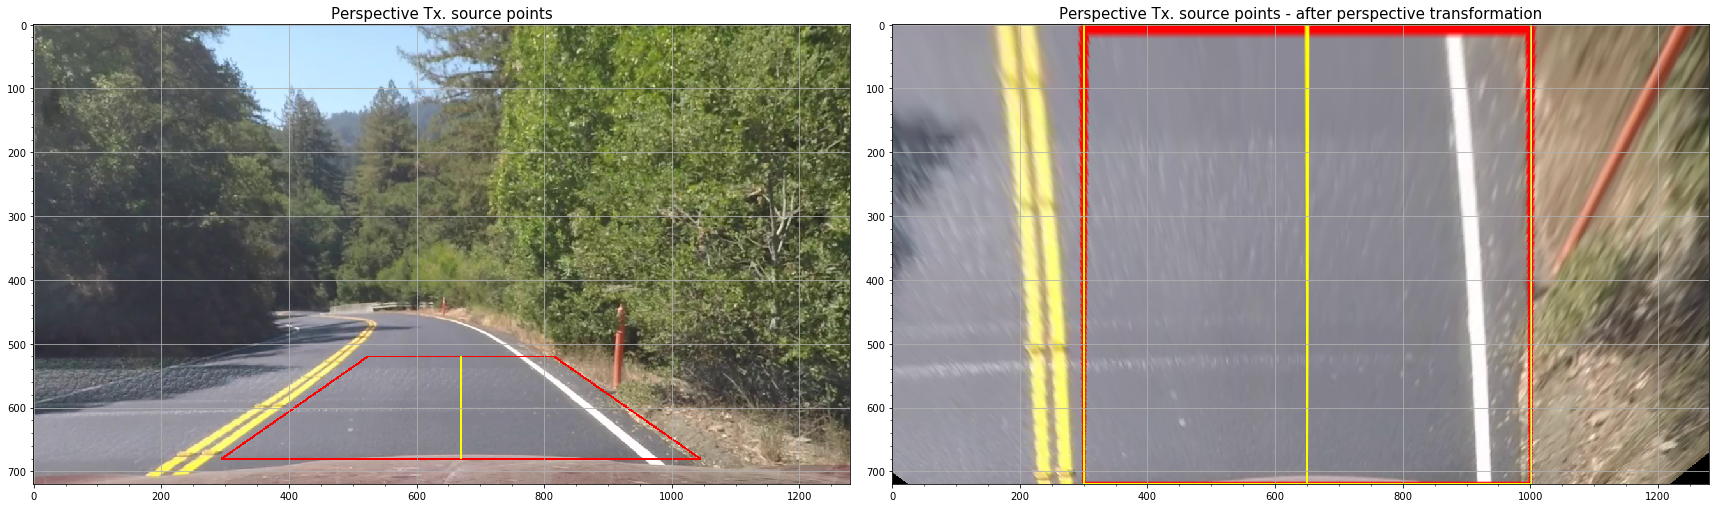

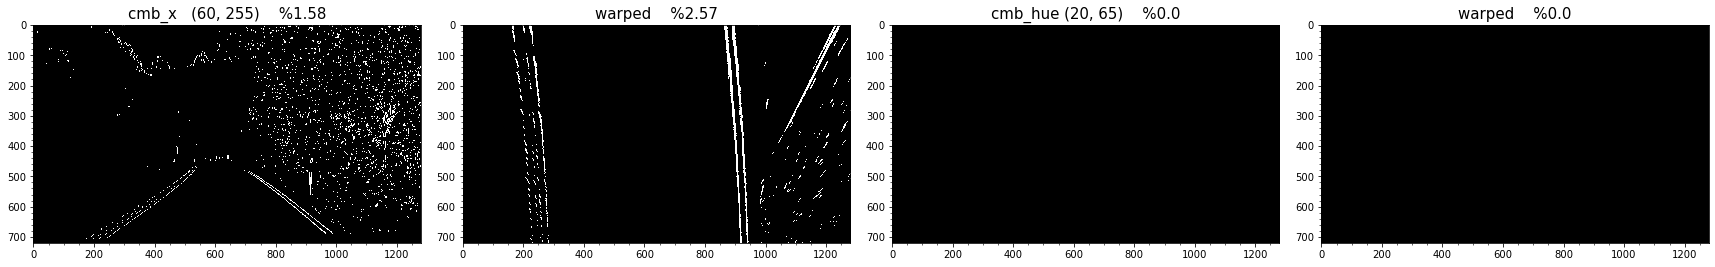

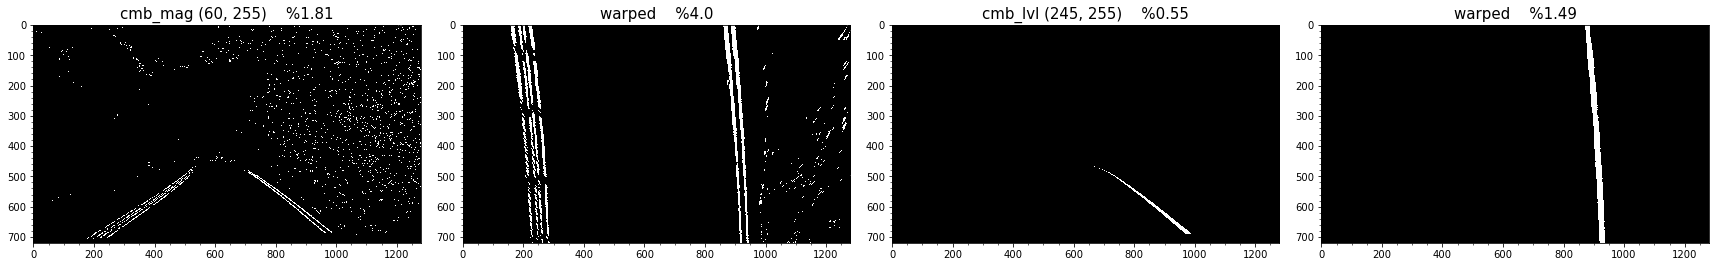

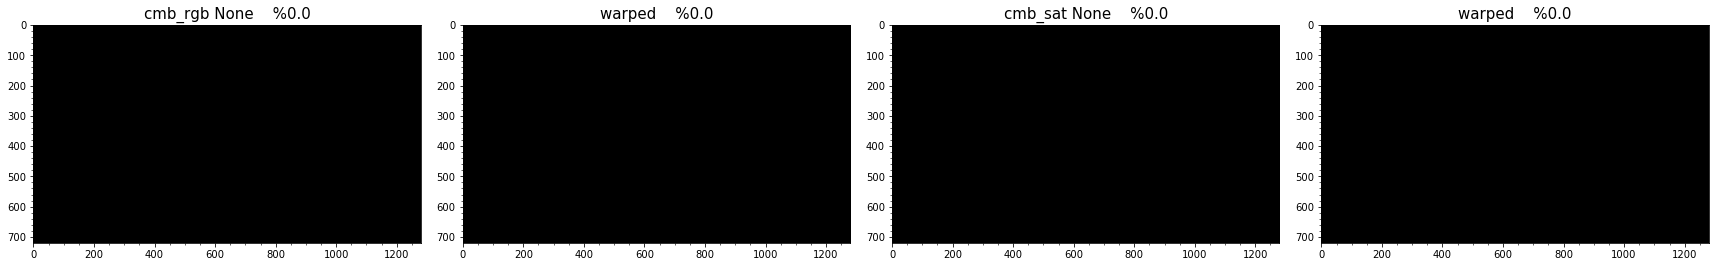

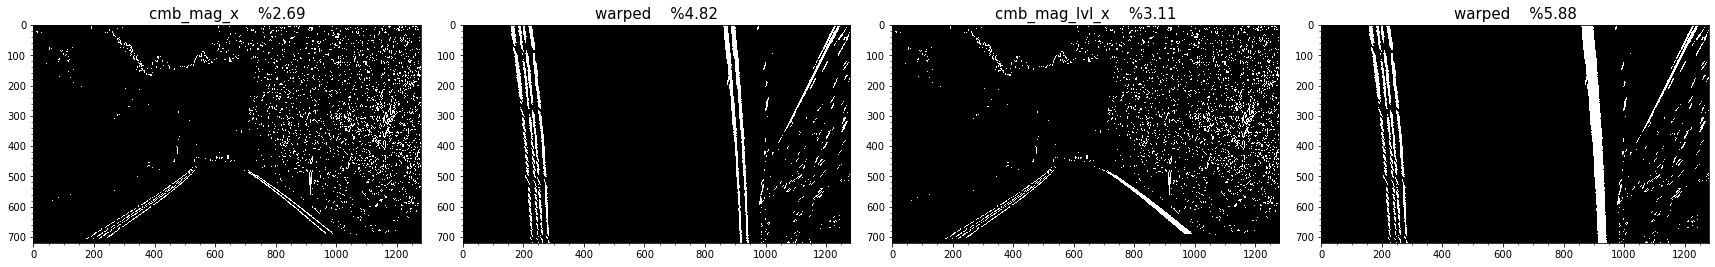

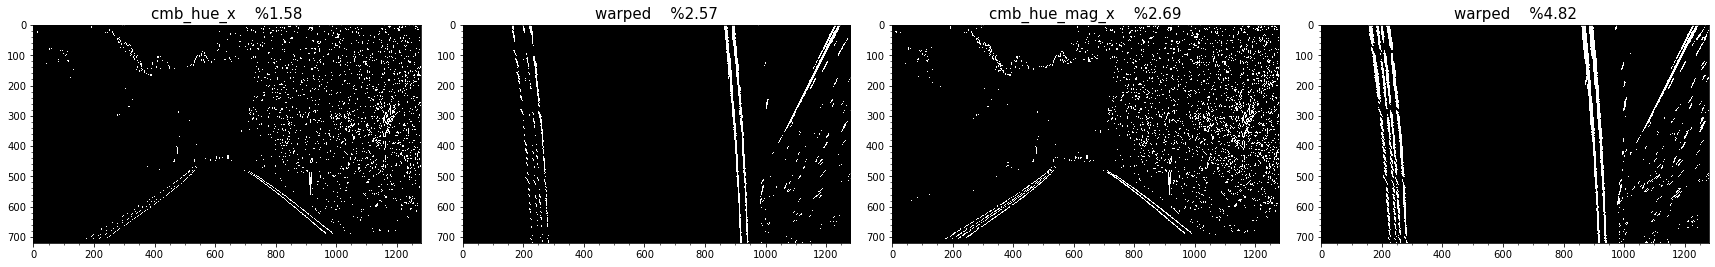

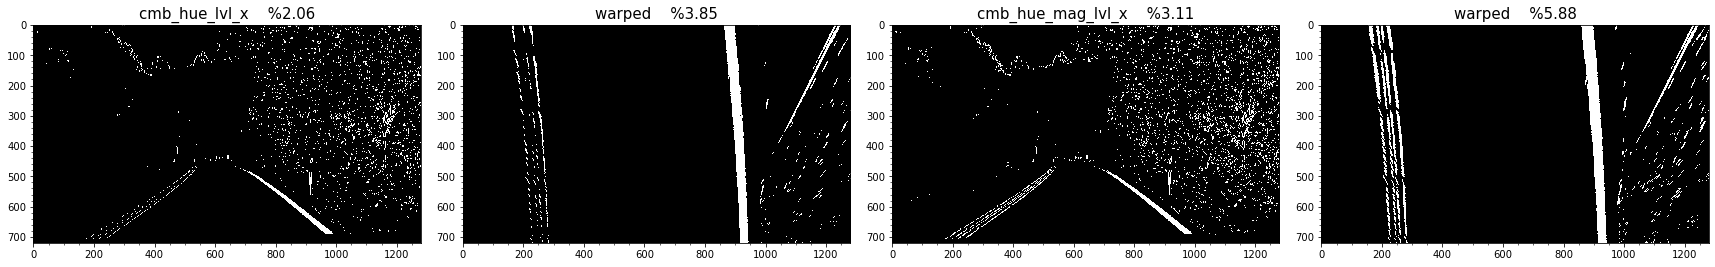

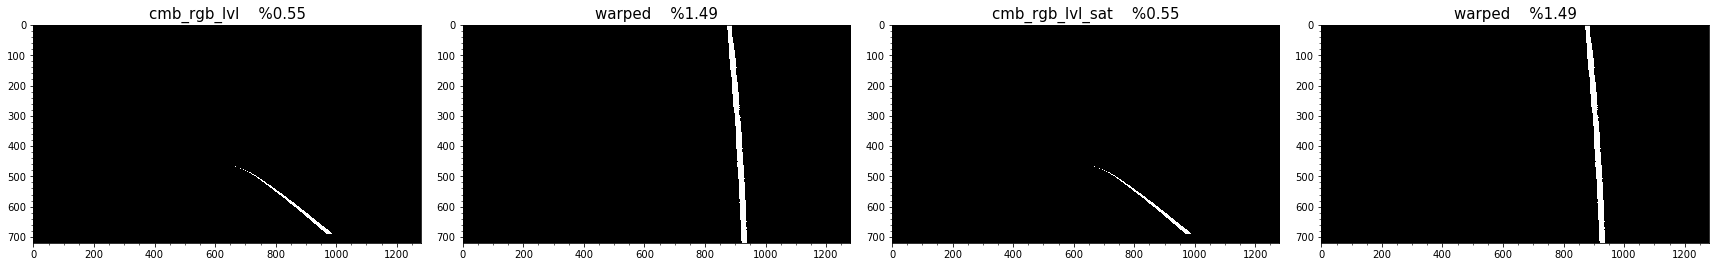

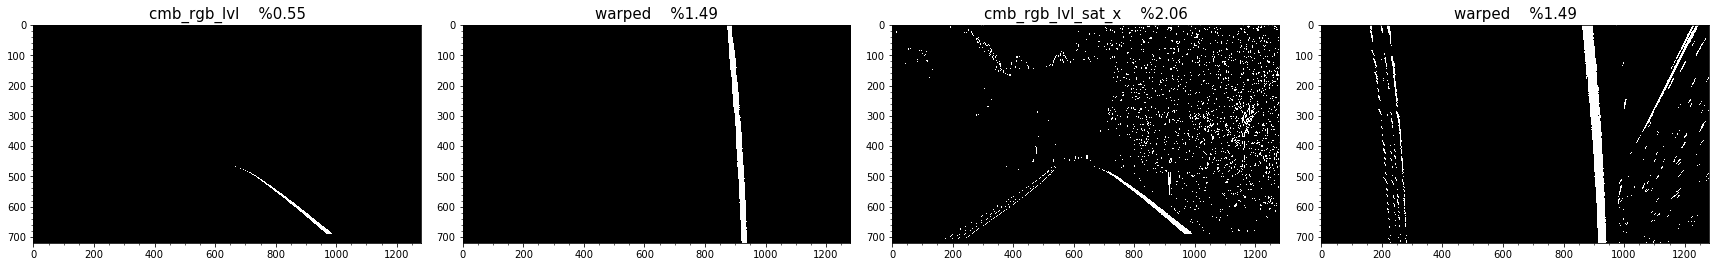

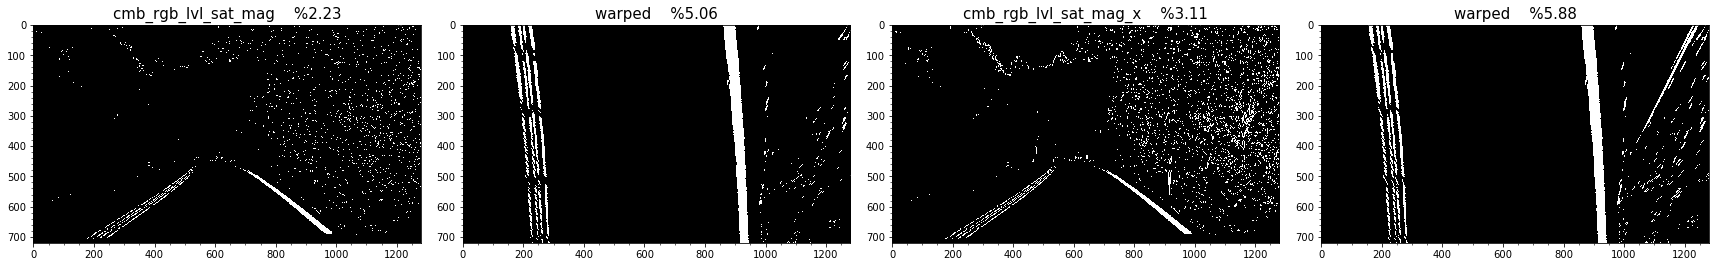

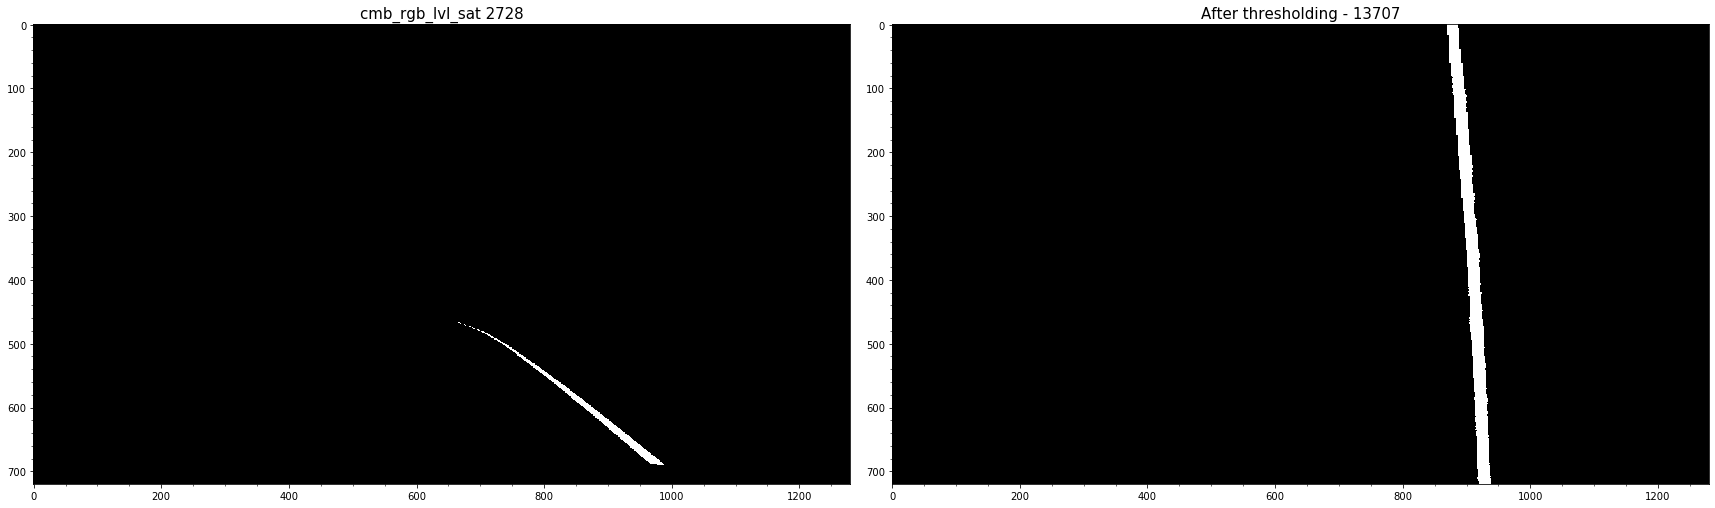


sliding _window_detection()
--------------------
 NWindows: 30   window search margi : 45   windows_width: 90   window_height:  24    minpix: 90    maxpix : 2160 
 Prev-1   X Base Left      : 0  right: 0

 reset_x_base  True
 reset search base            :  True
 histogram before padding     :   1200    After:   1280    Midpoint:    640
 histRange  :             Left:     40    Right:   1240    Top:    540    Bottom:    720
 Prev frame x_base        Left:      0    Right:      0
 max x  from histogram    Left:      0    Right:    180
 x_base from histogram    Left:      0    Right:    279
 Search window center X - Left:      0    Right:    919

 MX Left            : 0.0053  Right: 0.0053              MY Left            : 0.0417    Right: 0.0417
 MX_nominator Left  :   0.01  Right:   0.01              MY_nominator Left  :  30.00    Right:  30.00
 MX_denominator Left: 700.00  Right: 700.00              MY_denominator Left: 720.00    Right: 720.00

---------------------------------------

IndexError: list index out of range

In [14]:
img, disp = Pipeline.process_one_frame(read_next = True, displayRealignment = True)

In [9]:
# display_one(Pipeline.working_image)
# display_one(Pipeline.imgThrshld)
# disp
# Pipeline.overlayBeta = 0.5

In [83]:
# Pipeline.LeftLane.poly_deg
# print(np.all(np.isfinite(Pipeline.LeftLane.allx) & np.isfinite(Pipeline.LeftLane.ally)))
# print(len(Pipeline.LeftLane.allx), len(Pipeline.LeftLane.ally))
# np.any(np.isnan(Pipeline.LeftLane.ally))
# pp = np.polyfit(Pipeline.LeftLane.ally , Pipeline.LeftLane.allx , Pipeline.LeftLane.poly_deg, full=False)
# pp

# Pipeline.ImageThresholds[1]['low']['lvl_thr'] = None
# Pipeline.ImageThresholds[1]['vlow']['x_thr'] = (45,255)
# print(Pipeline.ImageThresholds[1]['vlow']['x_thr'])
# print(Pipeline.ImageThresholds[1]['vlow']['mag_thr'] )
# print(Pipeline.ImageThresholds[1]['low']['lvl_thr'])
# Pipeline.ImageThresholds[1]['med']['rgb_thr']  = (180,255)
# Pipeline.ImageThresholds[1]['med']['sat_thr']  ##  = (180,255)
# Pipeline.thresholds_to_str()

# Pipeline.thresholdMethods[1]['med'] = 'cmb_rgb_lvl_sat'
# Pipeline.thresholdMethods[1]['med']
# Pipeline.thresholdMethods[1]['low']  = 'cmb_mag_x'
# itStr[1]['vlow']['y_thr']
print(Pipeline.displayResults, Pipeline.displayFittingInfo, Pipeline.displayRealignment)
Pipeline.overlayBeta

True False True


0.5

###  second frame

{'read_next': True, 'displayRealignment': True}
 displayRealignement: True   displayResults:  True  displayFittingInfo:  False
Frame:   62 - 2069 ms - Image RGB: 121  (115,120,128)         WARPED RGB: 125  HLS:  62   H:  46   L: 126   S:  13    MED   - cmb_rgb_lvl_sat
 Thresholds:  HIGH RGB: 205    MED RGB: 170   LOW RGB: 120  VLOW RGB: 90   X-HIGH SAT: 120  HIGH SAT: 65   LOW SAT: 30 

   x_top_disp     : 60             x_src_center    : 670            x_bot_disp     : 375  
   x_src_top_left : (610, 480)     x_src_top_right : (730, 480)     x_src_bot_left : (295, 700)     x_src_bot_right : (1045, 700) 
   y_src_top_left : (300, 0)       y_src_top_right : (1000, 0)      y_src_bot_left : (300, 719)     y_src_bot_right : (1000, 719) 


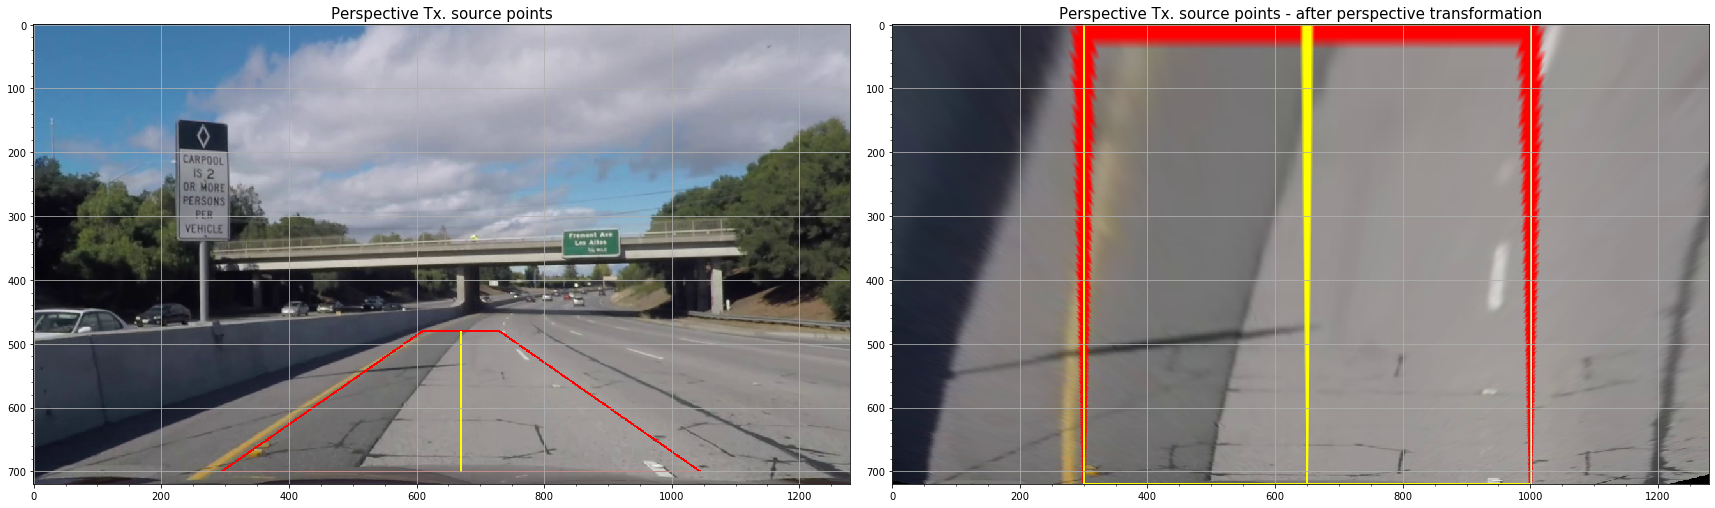

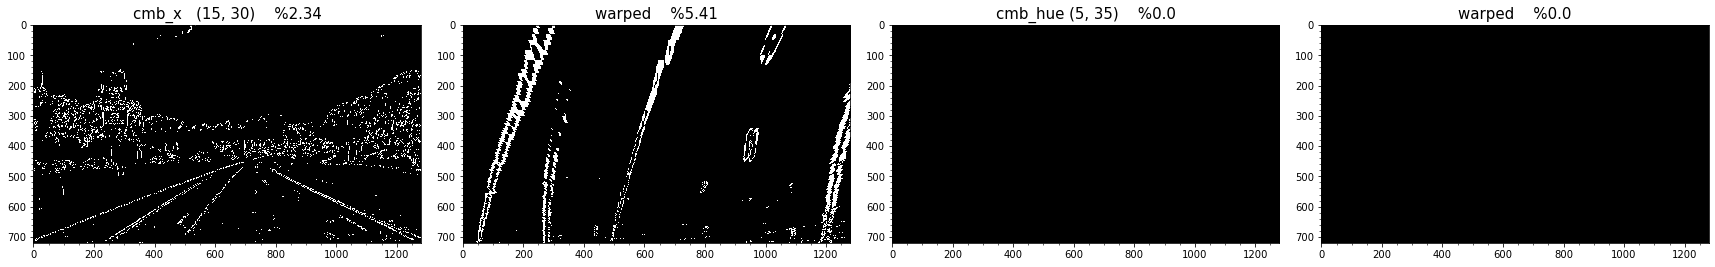

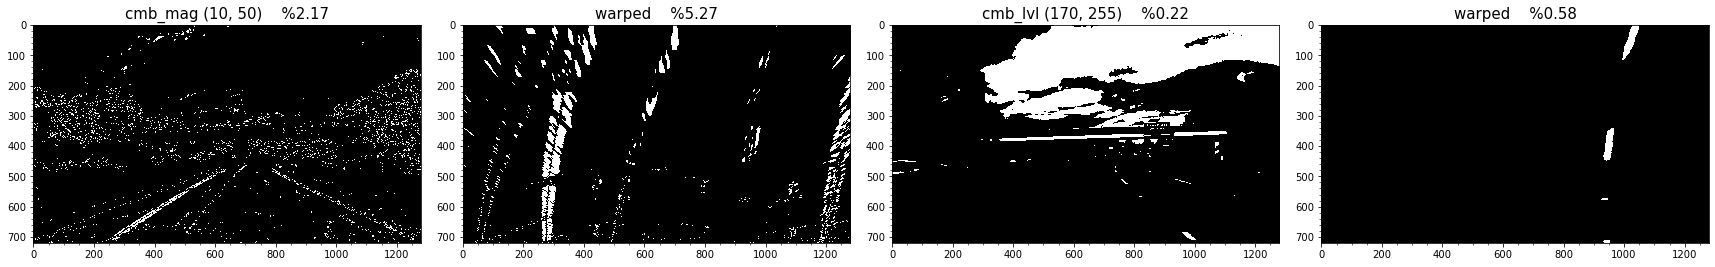

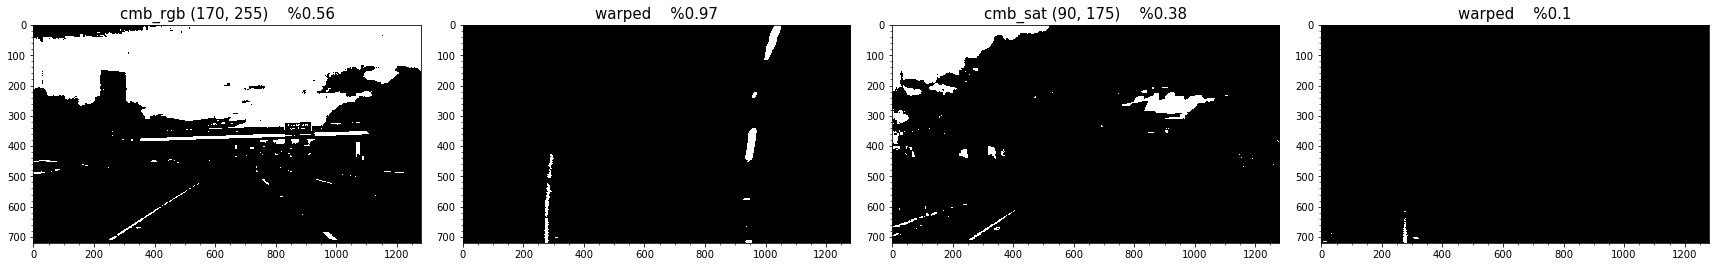

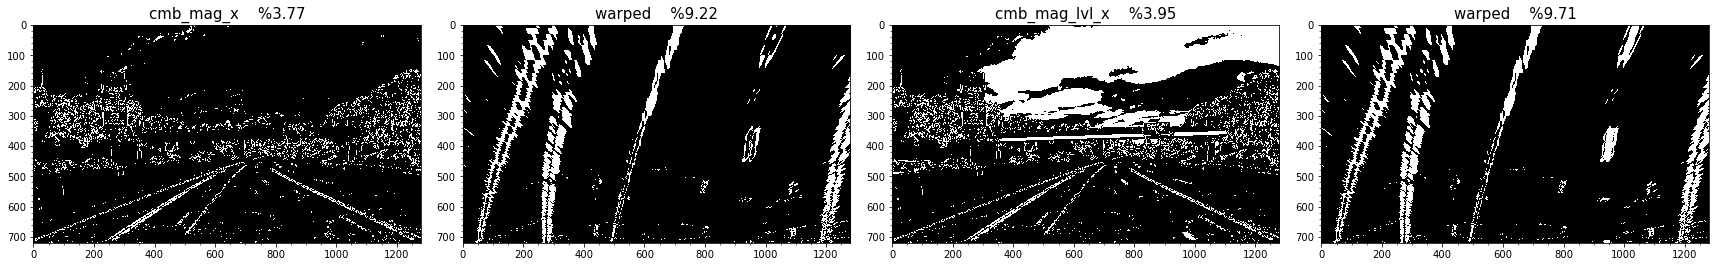

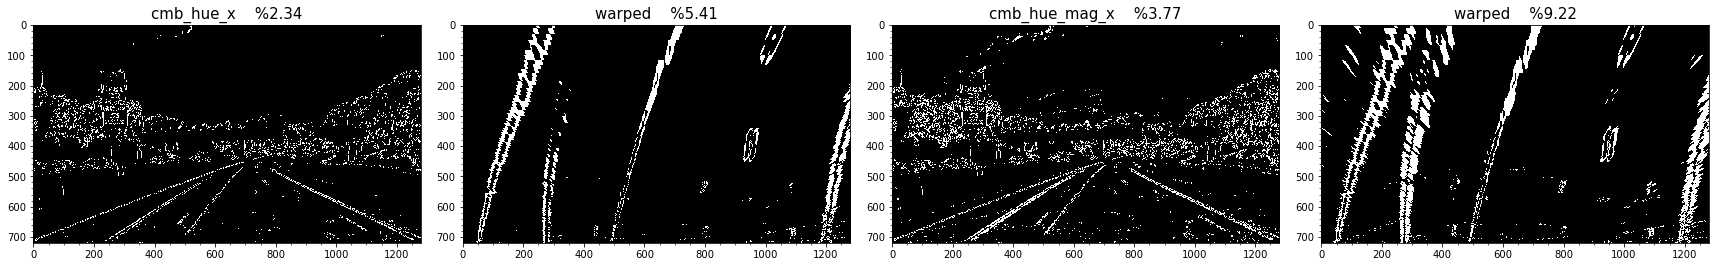

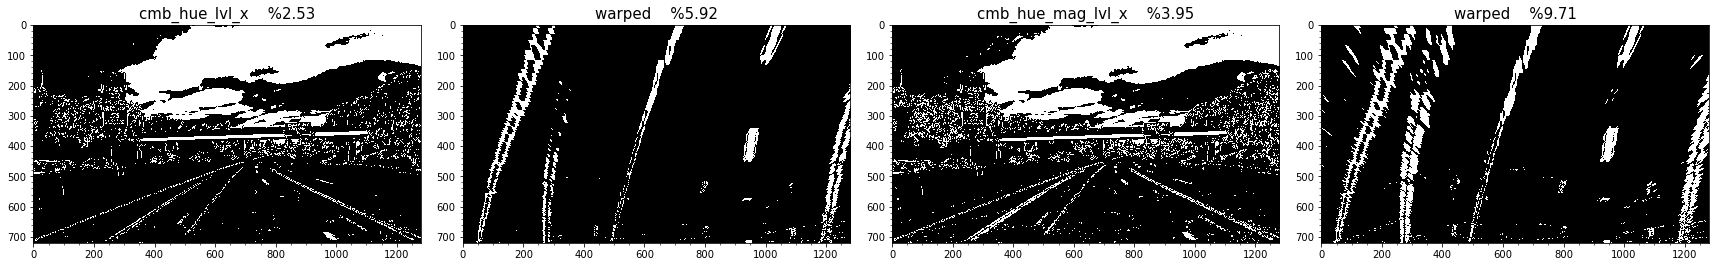

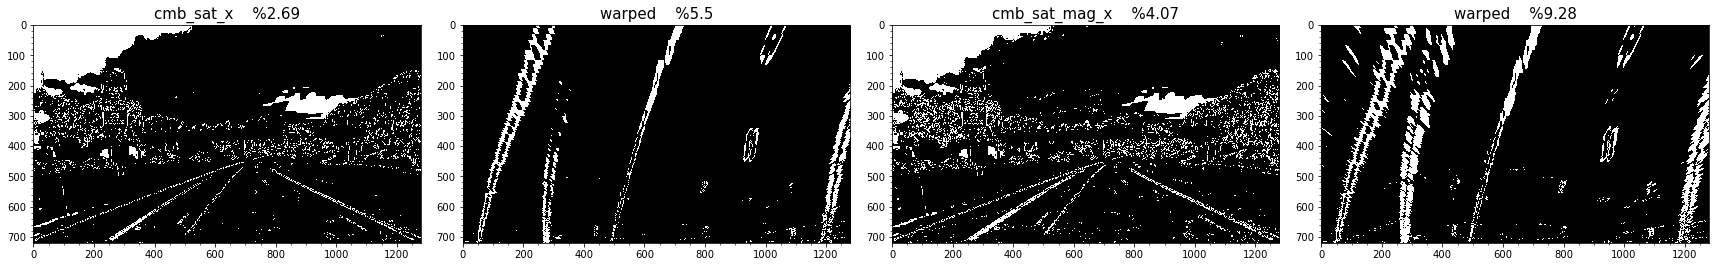

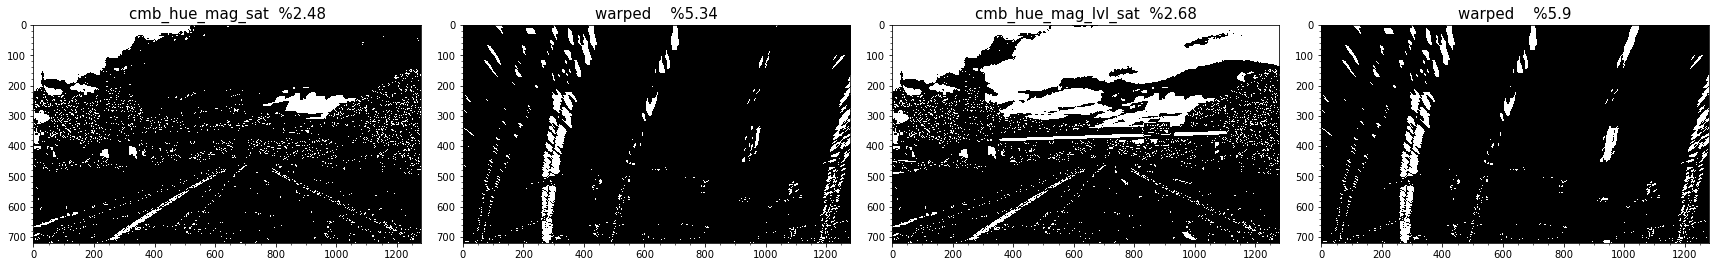

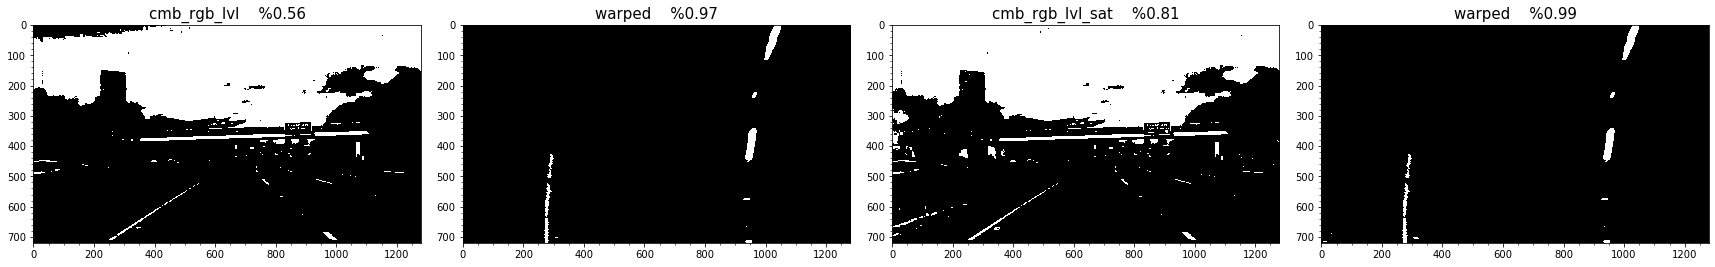

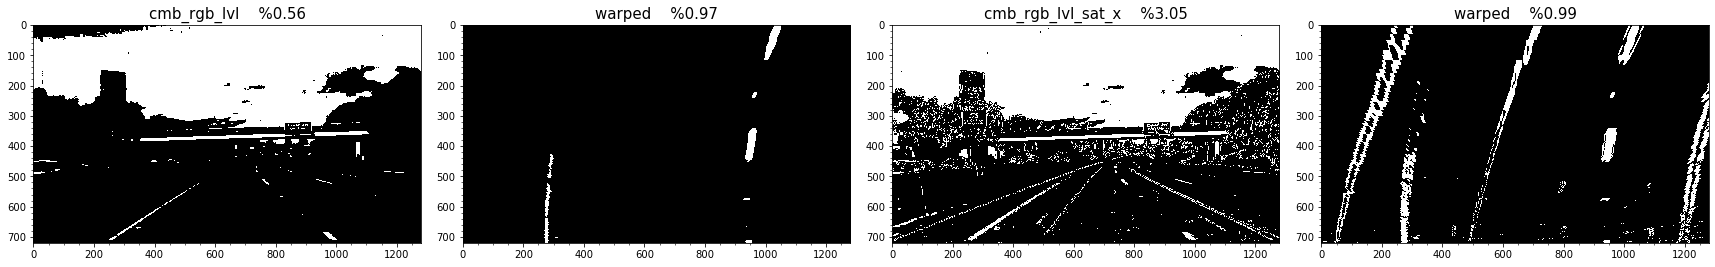

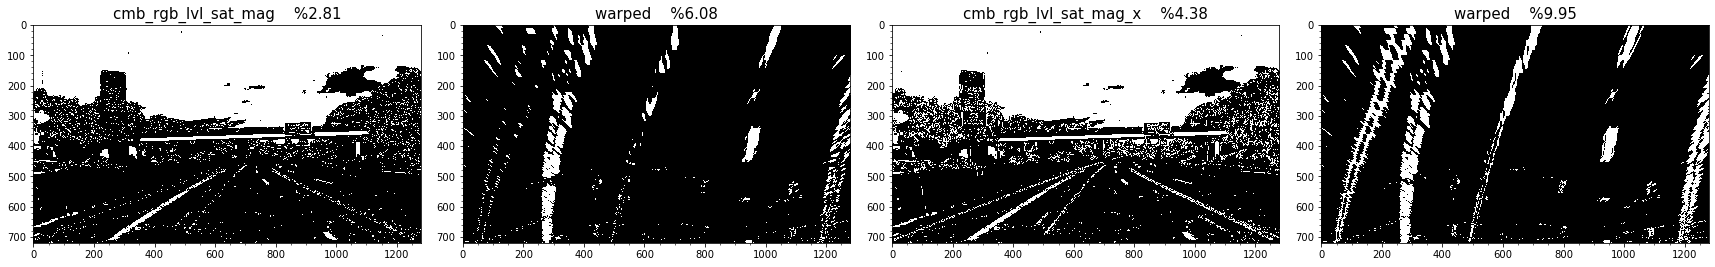

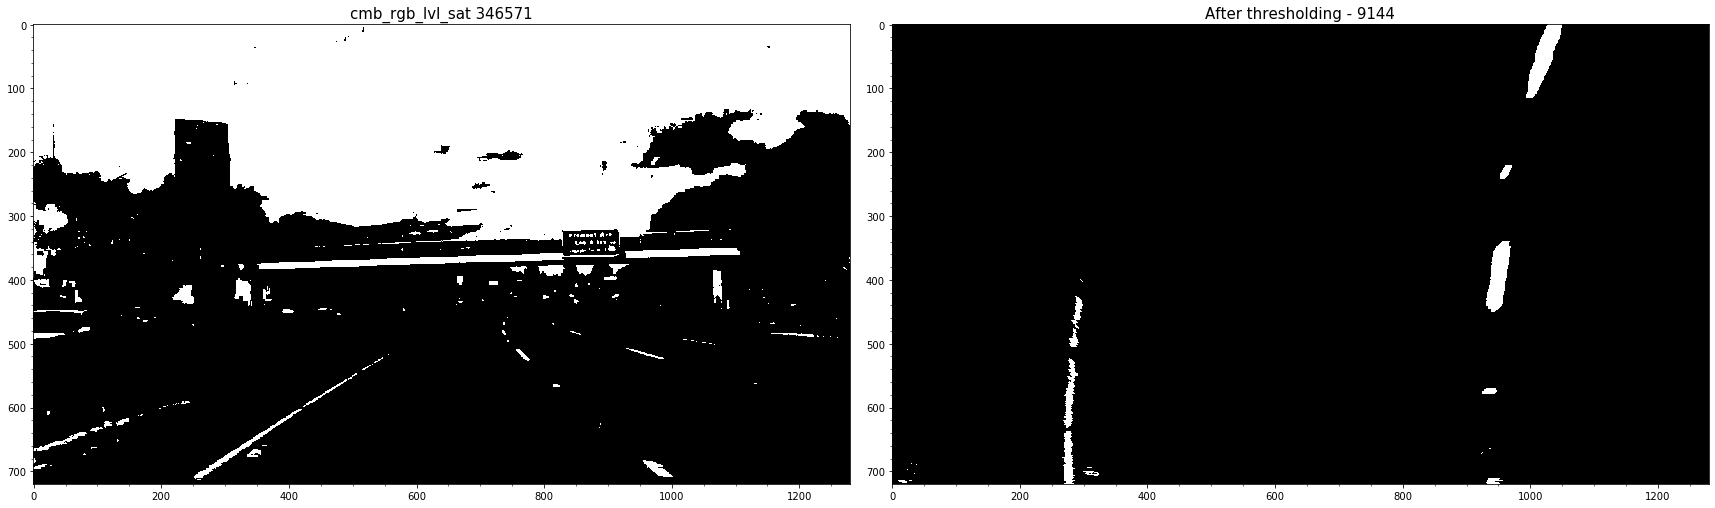

Search_around_poly()
--------------------
   Search margin       : 40     
   Histogram max   Left: 279     Right: 935
   Prev-1   X Base Left: 280     Right: 948
   Previous X Base Left: 279     Right: 945

   ttl pixels in image          :   921600    NZ pixels in image         :     9144   imgPixelRatio   : %    0.99
   ttl pixels in search region  :   115200    NZ pixels in search region :     9053   NztoSrchNzRatio : %    7.86
   ttl non-zero pixels in image :     9144    NZ pixels in search region :     9053   NztoImageNzRatio: %   98.99
   Detected Pixel Count    Left :     2907    Right:     6146 
   Detected Pixel Ratio    Left :     5.05    Right:    10.67 
  NZ pixels  - in image  :     9144   search reg:     9053      Nz to imgPixel Ratio: % 0.99    Nz to SrchRegion Ratio : % 7.86    Nz to ImageNz Ratio: %98.99
  Detected Pixel Count L :     2907   R         :     6146      Detected Pixel Ratio  L: % 5.05    R: %10.67 

assess_lane_detections()
-----------------------------

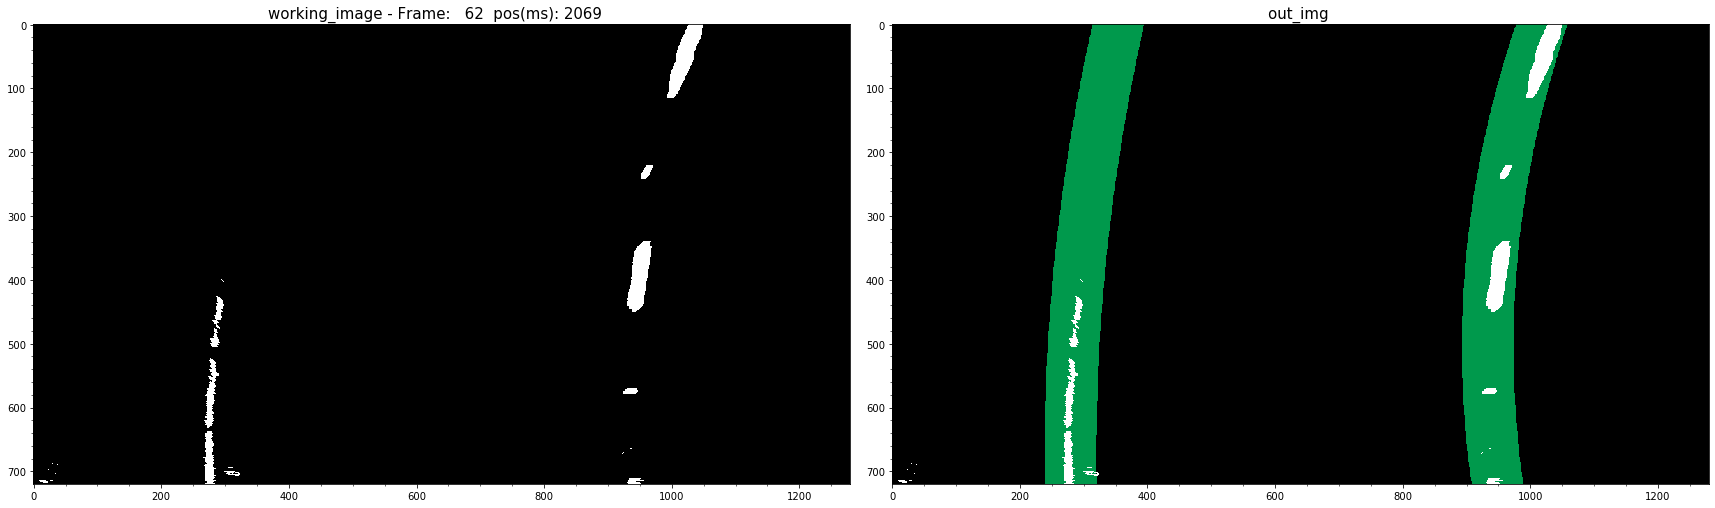

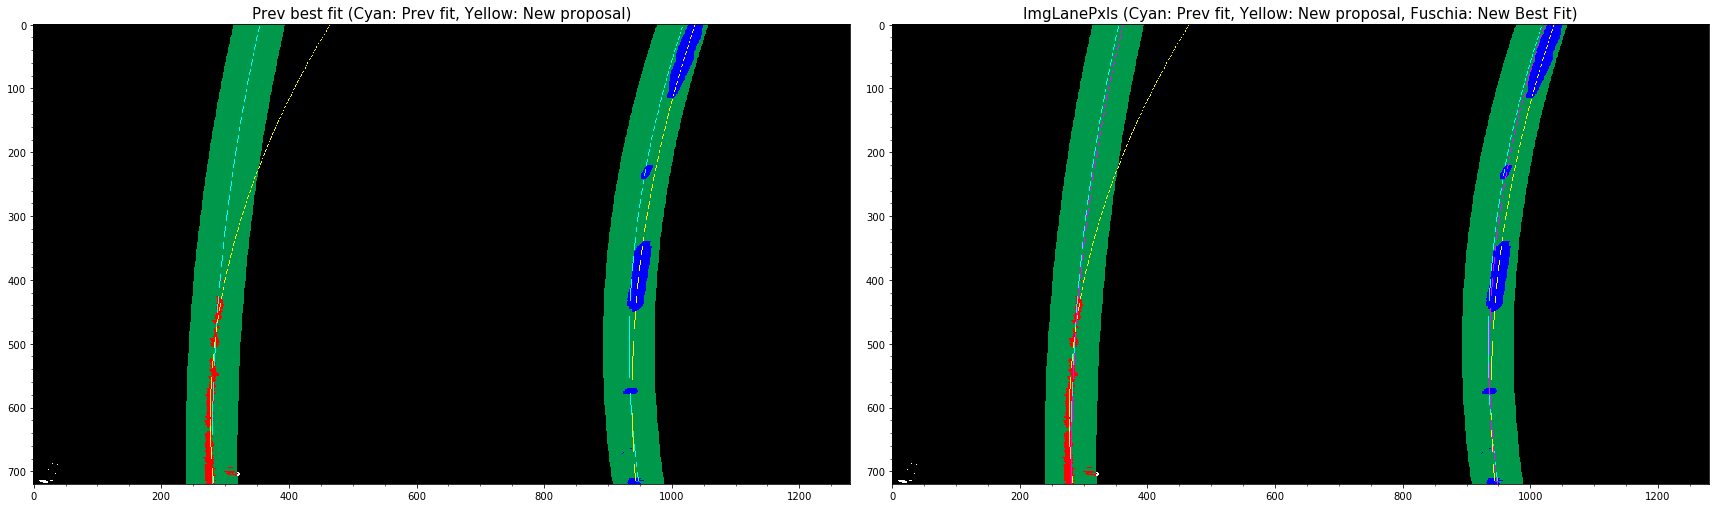


buildResultImage()
---------------
  Hist LLane :  [685.84, 624.1, 713.3, 874.79, 923.36, 950.12, 1118.75, 1056.45, 999.05, 921.06]
  Hist RLane :  [466.77, 452.74, 436.39, 431.51, 436.43, 445.44, 455.46, 473.82, 494.07, 515.1]
  Avg  LLane : [-5:] :     1009    [-10:] :      887 
  Avg  RLane : [-5:] :      477    [-10:] :      461 
 Original disp_start :      500      end:      700 
       Min avg radius:      477
 Modified disp start :      500      end:      700

adjust_RoI_window() - FirstFrame: False  AcceptPolynomial: True
-----------------------------------------------------------------
                 x_base :   Left:   279.00    Right:   944.00  
     Image Pixel Ratios :   Left:     5.05    Right:    10.67    Total:     0.99
      off center pixels :   28.00  History: [13.0, 14.0, 17.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27.0, 28.0] 
     diff(dyn_src, src) :   10.00  History: [9, 11, 10, 8, 8, 9, 7, 8, 9, 10] 
    Pixel ratio - Left  :    5.05  History: [5.51, 5.37, 4.63, 4.45

<Figure size 1800x3024 with 0 Axes>

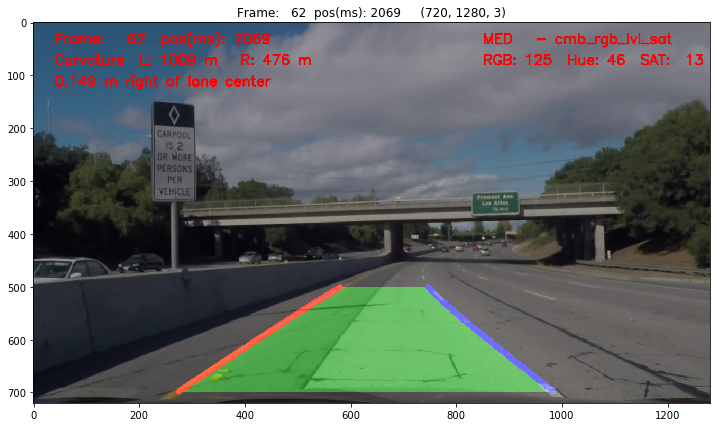

In [15]:
img, disp = Pipeline.process_one_frame(read_next = True, displayRealignment = True)

### third frame

{'read_next': True, 'displayRealignment': True}
 displayRealignement: True   displayResults:  True  displayFittingInfo:  False
Frame:    2 - 66.73 ms - Image RGB: 125  (117,124,133)         WARPED RGB: 142  HLS:  64   H:  43   L: 142   S:   9    MED   - cmb_rgb_lvl_sat
 Thresholds:  HIGH RGB: 205    MED RGB: 170   LOW RGB: 120  VLOW RGB: 90   X-HIGH SAT: 120  HIGH SAT: 65   LOW SAT: 30 

   x_top_disp     : 60             x_src_center    : 670            x_bot_disp     : 375  
   x_src_top_left : (610, 480)     x_src_top_right : (730, 480)     x_src_bot_left : (295, 700)     x_src_bot_right : (1045, 700) 
   y_src_top_left : (300, 0)       y_src_top_right : (1000, 0)      y_src_bot_left : (300, 719)     y_src_bot_right : (1000, 719) 


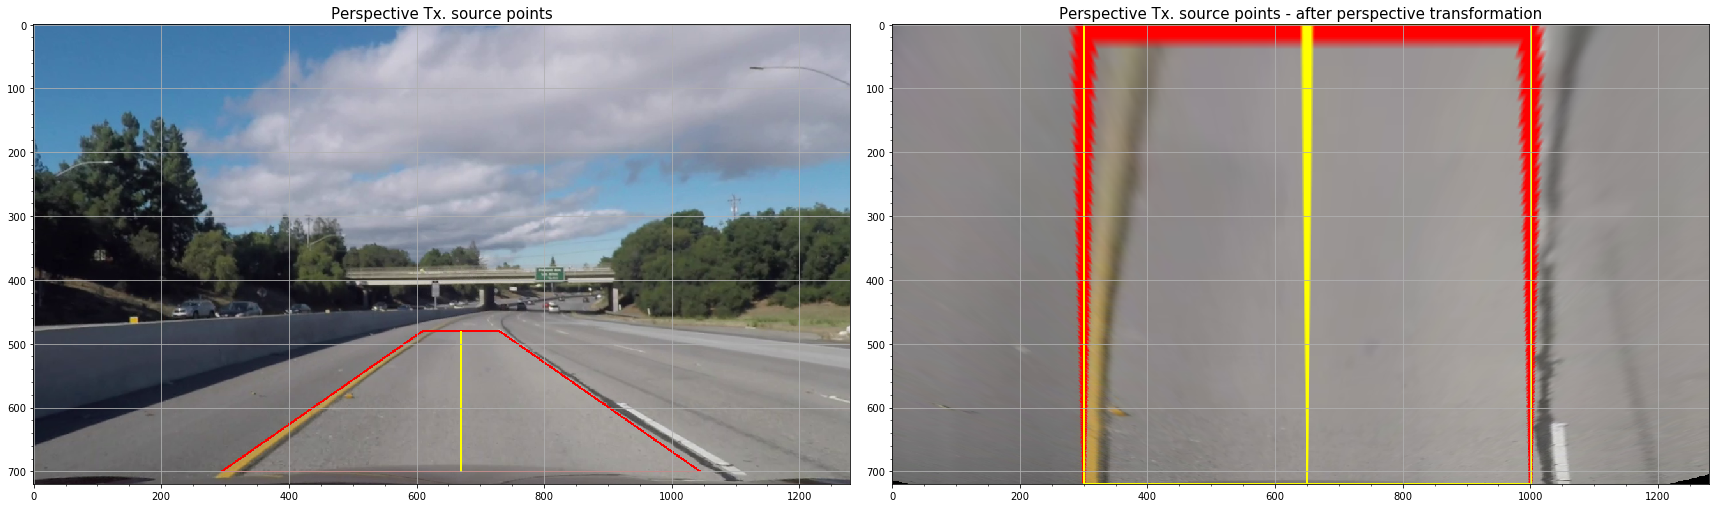

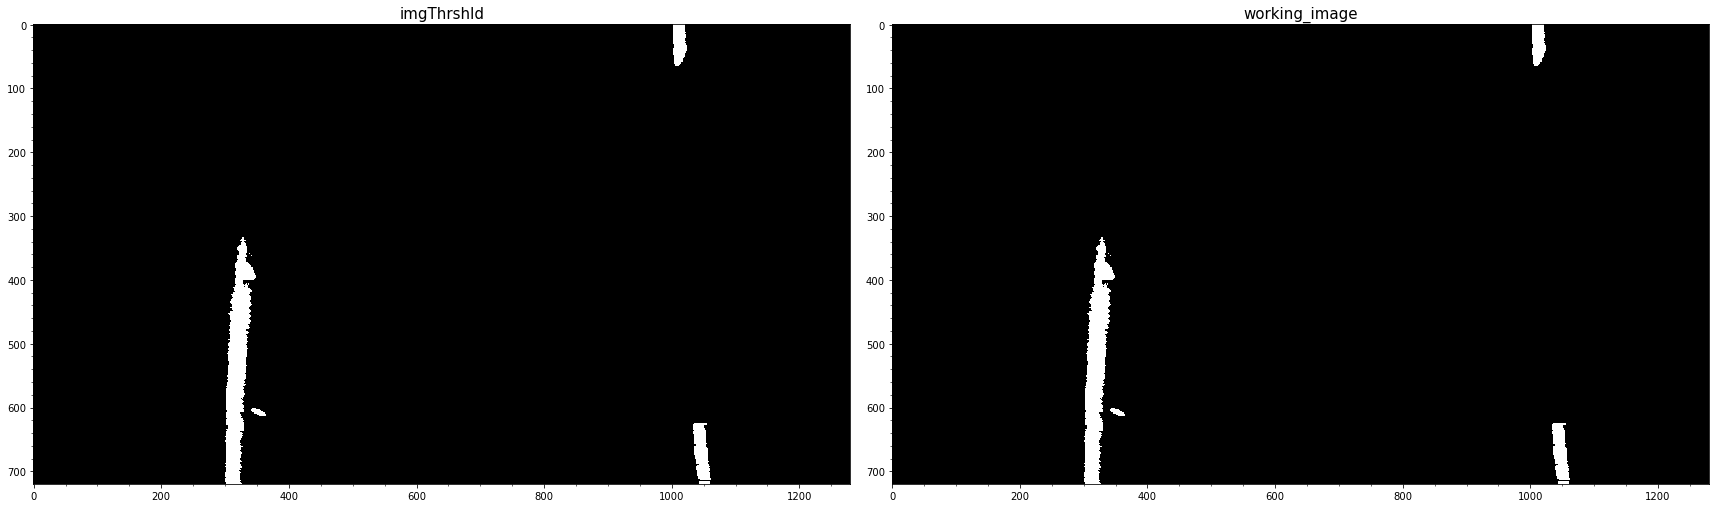

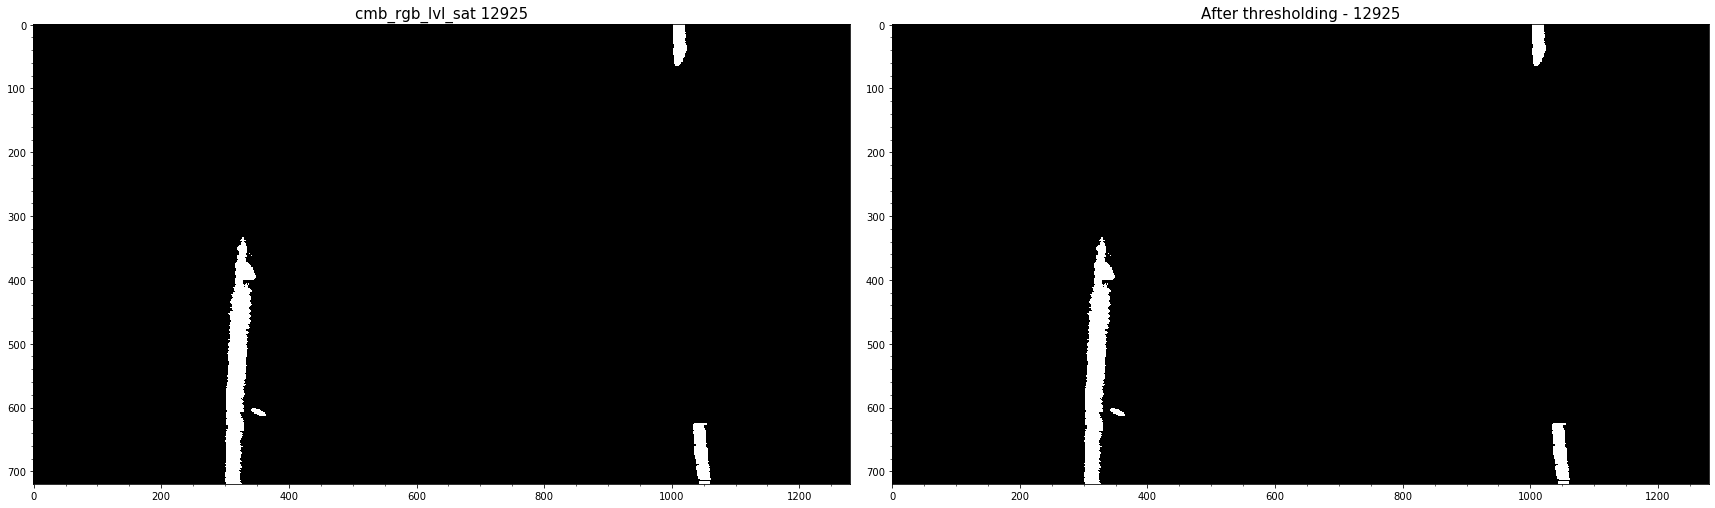

Search_around_poly()
--------------------
   Search margin       : 40     
   Histogram max   Left: 309     Right: 1045
   Prev-1   X Base Left: 313     Right: 1051
   Previous X Base Left: 312     Right: 1051

   ttl pixels in image          :   921600    NZ pixels in image         :    12925   imgPixelRatio   : %    1.40
   ttl pixels in search region  :   115200    NZ pixels in search region :    12863   NztoSrchNzRatio : %   11.17
   ttl non-zero pixels in image :    12925    NZ pixels in search region :    12863   NztoImageNzRatio: %   99.51
   Detected Pixel Count    Left :     9859    Right:     3004 
   Detected Pixel Ratio    Left :    17.12    Right:     5.22 
  NZ pixels  - in image  :    12925   search reg:    12863      Nz to imgPixel Ratio: % 1.40    Nz to SrchRegion Ratio : %11.17    Nz to ImageNz Ratio: %99.51
  Detected Pixel Count L :     9859   R         :     3004      Detected Pixel Ratio  L: %17.12    R: % 5.22 

assess_lane_detections()
--------------------------

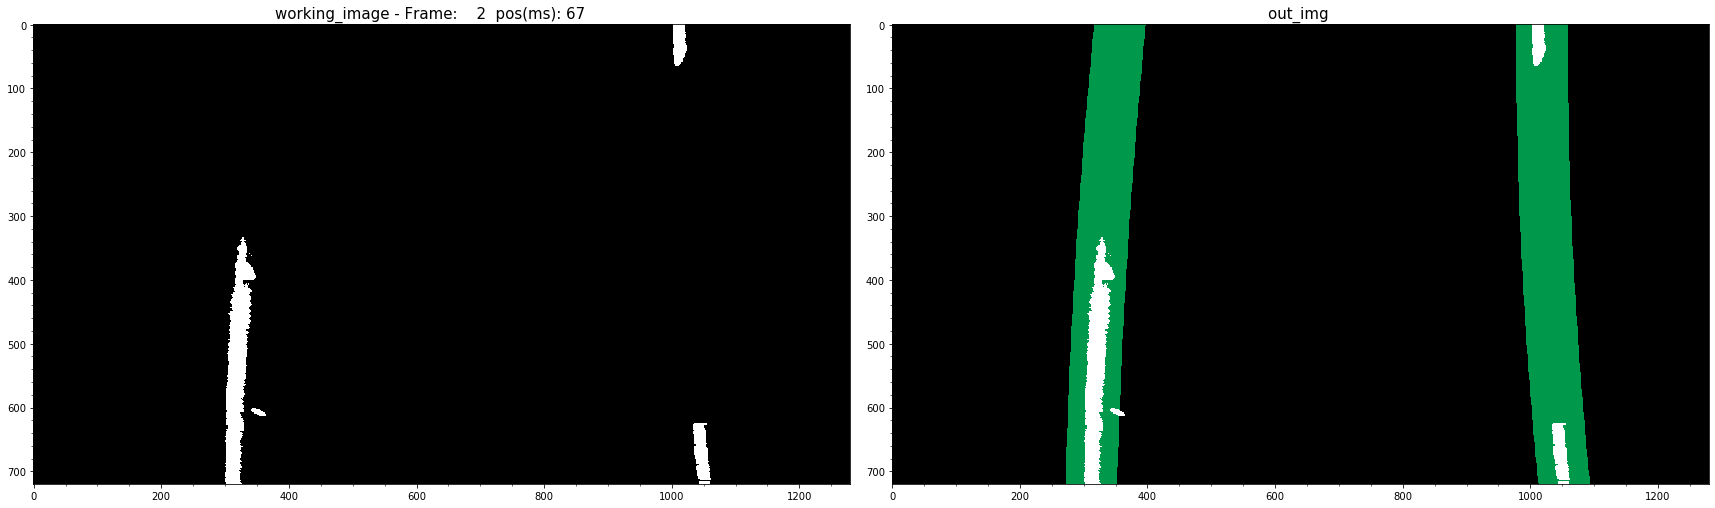

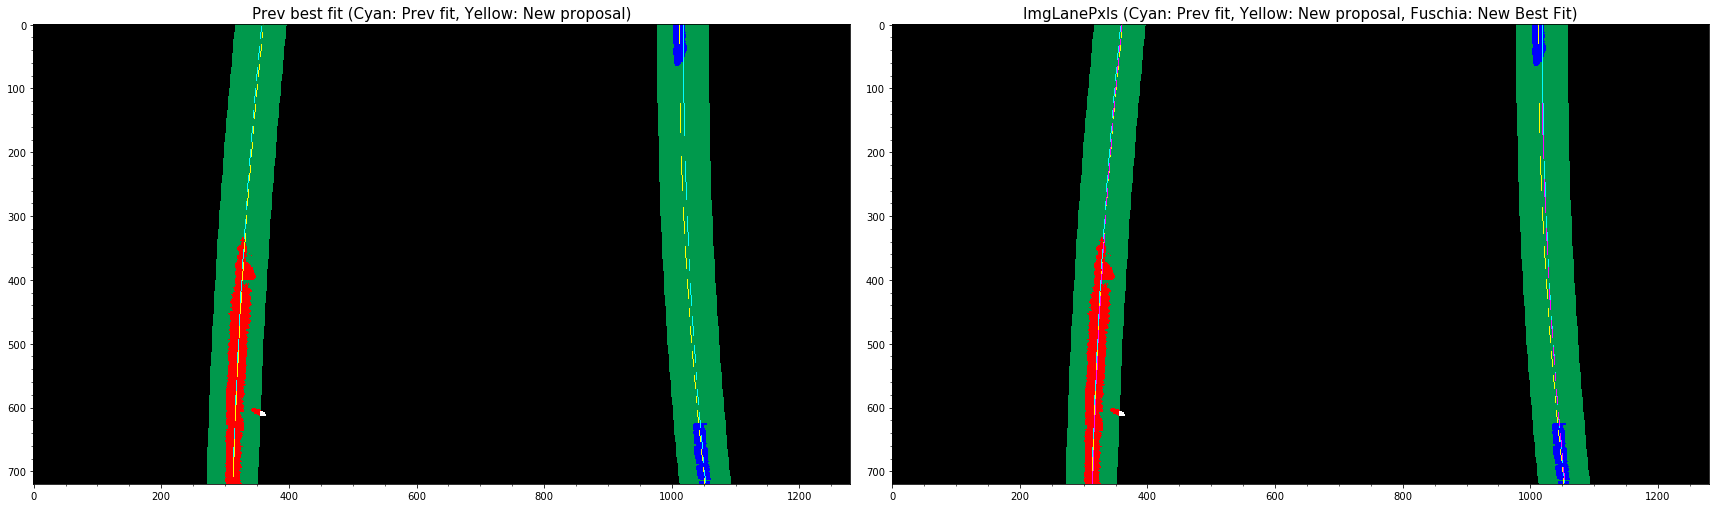


buildResultImage()
---------------
  Hist LLane :  [3481.67, 3391.6, 3324.33]
  Hist RLane :  [2507.58, 2364.41, 2256.33]
  Avg  LLane : [-5:] :     3399    [-10:] :     3399 
  Avg  RLane : [-5:] :     2376    [-10:] :     2376 
 Original disp_start :      500      end:      700 
       Min avg radius:     2376
 Modified disp start :      500      end:      700

adjust_RoI_window() - FirstFrame: False  AcceptPolynomial: True
-----------------------------------------------------------------
                 x_base :   Left:   312.00    Right:  1050.00  
     Image Pixel Ratios :   Left:    17.12    Right:     5.22    Total:     1.40
      off center pixels :  -42.00  History: [-42.0, -42.0, -42.0] 
     diff(dyn_src, src) :    9.00  History: [9, 9, 9] 
    Pixel ratio - Left  :   17.12  History: [14.81, 17.26, 17.12] 
    Pixel ratio - Right :    5.22  History: [3.06, 4.53, 5.22] 
    Pixel ratio - Image :    1.40  History: [1.34, 1.37, 1.4] 

        src_points_list :  [(610, 480), (

<Figure size 1800x3024 with 0 Axes>

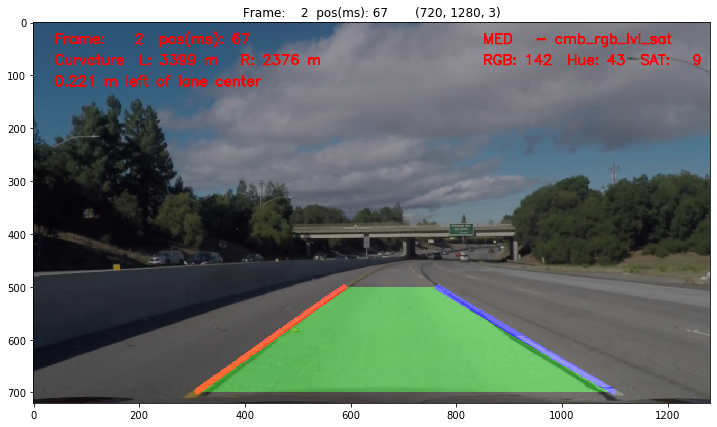

In [32]:
img, disp = Pipeline.process_one_frame(read_next = True, displayRealignment = True)

### close video file

In [ ]:
Pipeline.outVideo.closeVideoFile()

In [74]:
# Pipeline.LANE_COUNT_THRESHOLD = 1000
# Pipeline.LANE_RATIO_THRESHOLD = 2.0 
# Pipeline.LANE_RATIO_LOW_THRESHOLD 

# Pipeline.LANE_RATIO_HIGH_THRESHOLD = 95

# Pipeline.IMAGE_RATIO_LOW_THRESHOLD =1.0
# a = np.copy(Pipeline.LeftLane.best_fit)
# Pipeline.RightLane.best_fit = np.concatenate(([0.0], a))
# Pipeline.working_image.shape
# Pipeline.POLY_SRCH_MRGN 
# Pipeline.LANE_COUNT_THRESHOLD = 2700
Pipeline.POLY_SEARCH_MARGIN = 30
# Pipeline.display_thresholds()
# Pipeline.ImageThresholds[1]['high']['hue_thr'] = (25,65)
# print(Pipeline.ImageThresholds[1]['high']['lvl_thr'] , Pipeline.itStr[1]['high']['lvl_thr'])
# Pipeline.thresholds_to_str()
# Pipeline.imgCondHistory.count(-20)
# Pipeline.acceptHistory[-5:]
# Pipeline.SrcAdjustment_history[-2:]
# Pipeline.itStr[1]

# Pipeline.LANE_RATIO_LOW_THRESHOLD = 8.0

### Misc 

In [ ]:
# rc1= Pipeline.inVideo.getNextFrame()  
# if rc1:
#     outputImage, disp = Pipeline(displayResults = True, debug = True, debug2 = False)
#     Pipeline.outVideo.saveFrameToVideo(outputImage, debug = False)        
#     display_one(outputImage, size=(15,7), title = Pipeline.frameTitle)
#     winsound.MessageBeep(type=winsound.MB_ICONHAND)

In [ ]:
# print(max(Pipeline.LeftLane.RMSE_history), min(Pipeline.LeftLane.RMSE_history))
# print(max(Pipeline.RightLane.RMSE_history), min(Pipeline.RightLane.RMSE_history))
# Pipeline.RightLane.avg_pixelRatio = 0
# Pipeline.IMAGE_RATIO_HIGH_THRESHOLD = 30

In [ ]:
#### 

# Pipeline.POLY_SRCH_MRGN = 40
# Pipeline.PARALLEL_LINES_MARGIN =50
# for i in range(-1,-6,-1):
#     print(Pipeline.RightLane.best_fit_history[i])

# Pipeline.debugInfo_DetectionInfo()
# Pipeline.RED_DETECTION_LIMIT = 50
# print(Pipeline.acceptHistory[-10:])
print(Pipeline.imgCondHistory[-10:])
# print(Pipeline.slidingWindowBootstrap)
# Pipeline.acceptHistory[-1] = -20
# Pipeline.slidingWindowBootstrap  = True
print(Pipeline.imgCondHistory.count(-20))


In [ ]:
binary_warped = np.copy(Pipeline.working_image)
img_height = binary_warped.shape[0]
img_width  = binary_warped.shape[1]
histWidthRange  = Pipeline.HISTOGRAM_WIDTH_RANGE
histDepthRange  = Pipeline.HISTOGRAM_DEPTH_RANGE
histLeft  = max(img_width//2 - histWidthRange, 0)  
histRight = min(img_width//2 + histWidthRange, img_width)  
# histTop   = min(histDepthRange, img_height)
histTop   = 0
histBot   = Pipeline.y_src_bot 
print( ' Width range: ', histWidthRange, '   Depth range:', histDepthRange)
print( ' histLeft   : ', histLeft      , '   histRight  :', histRight)
print( ' histTop    : ', histTop       , '   histBot    :', histBot)

histogram = np.sum(binary_warped[histTop : histBot, histLeft : histRight], axis=0)
histogram = np.pad(histogram, (histLeft, binary_warped.shape[1]-histRight))
avg = histogram.mean()
print(' historgram avg: ', avg)
midpoint  = np.int(histogram.shape[0]//2)
win_xleft_center  =  np.argmax(histogram[:midpoint]) 
win_xright_center =  np.argmax(histogram[midpoint:]) + midpoint
ttl = ' Search window center X - Left: {:6d}    Right: {:6d}'.format(win_xleft_center  , win_xright_center)

display_one(binary_warped, cmap = 'gray')
display_one(histogram, title = ttl)    
print(ttl)

##  B - Process RANGE of video frames 

In [5]:
# toFrame = Pipeline.inVideo.currFrameNum + 5

DISPLAY = True; DEBUG   = False; DEBUG2  = False; DEBUG3 = False
SIZE    = (15,5)

toFrame = 9999
DISP_INTERVAL = 20
SHOW   = False

Pipeline.process_frame_range(toFrame, disp_interval = DISP_INTERVAL, show = SHOW, 
                             debug = False,displayRealignment = False, displayResults = False)

 displayFittingInfo:  False  displayRealignment: False   displayResults:  False
From :  0.0  To: 9999
 reset_x_base  True
 ERROR in reading next frame
Finshed - Curr frame number : 1260


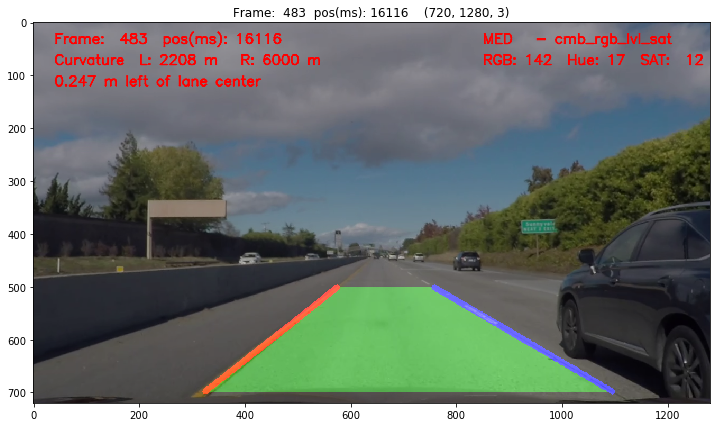

In [4]:
display_one(Pipeline.resultImage, size=(15,7), title = Pipeline.frameTitle) 

# Pipeline.outVideo.closeVideoFile()

In [91]:
# Pipeline.resultExtraInfo

In [6]:
Pipeline.outVideo.closeVideoFile()

 output video file closed : ./output_videos_test\project_video_output_20201006_1006.mp4


In [7]:
with open('./challenge_video_pipeline.pkl', 'wb+') as outfile:
    pickle.dump(Pipeline, outfile)

PicklingError: Can't pickle <class 'classes.videopipeline.VideoPipeline'>: it's not the same object as classes.videopipeline.VideoPipeline

## Plot results and errors 

In [22]:
# Pipeline.imgUndistStats['RGB'][174:220]
# Pipeline.imgCondHistory

####  plot_1

In [144]:
# print(Pipeline.SrcAdjustment_history)
idx = 105
# print('\n Src/DynPts Diffs: \n',Pipeline.diffsSrcDynPoints[idx:])
# print('\n imgPixelRatio      : \n',Pipeline.imgPixelRatio[idx:])
# print('\n imgWarpedStats[Sat]: \n',Pipeline.imgWarpedStats['Sat'][idx:])
# print('\n imgWarpedStats[RGB]: \n',Pipeline.imgWarpedStats['RGB'][idx:])
# print('\n imgCondHistory[RGB]: \n',Pipeline.imgCondHistory[idx:])
# print('\n imgThrshldHistory[RGB]: \n',Pipeline.imgThrshldHistory[idx:])

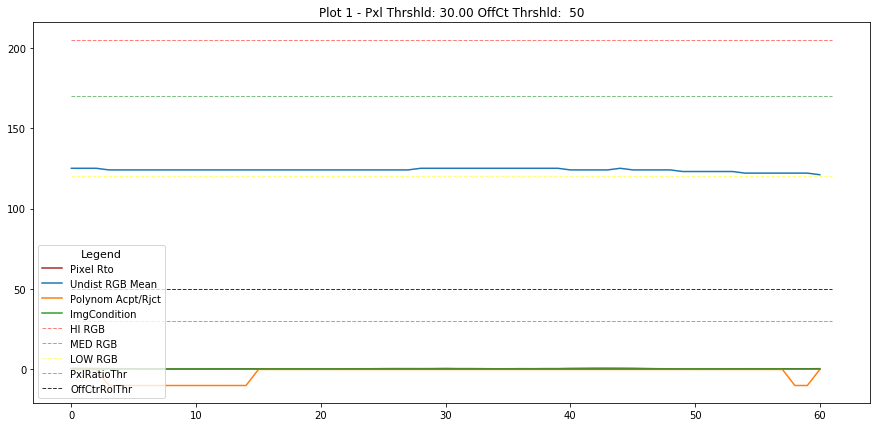

In [15]:
plot_1(Pipeline,legend = 'lower left')

####  plot_3

65 30


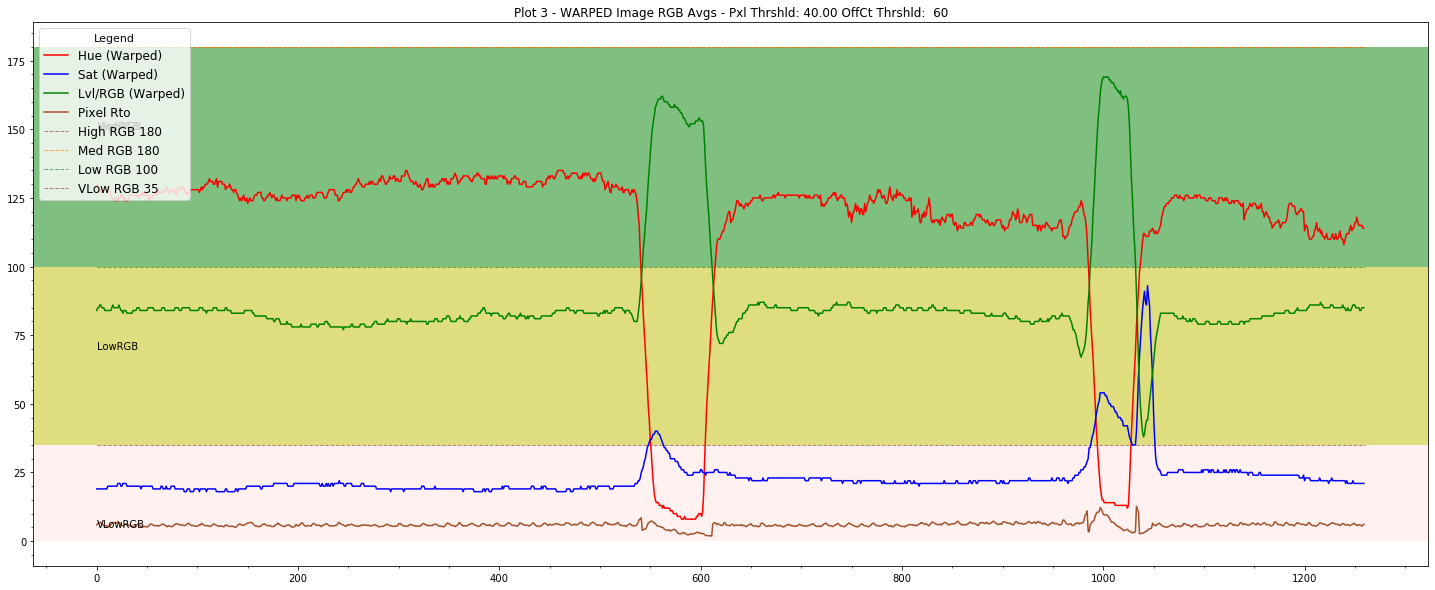

In [143]:
print(Pipeline.HIGH_SAT_THRESHOLD, Pipeline.LOW_SAT_THRESHOLD)

plot_3(Pipeline, legend = 'upper left', size= (25,10), pxlthr = True)

####  plot_4

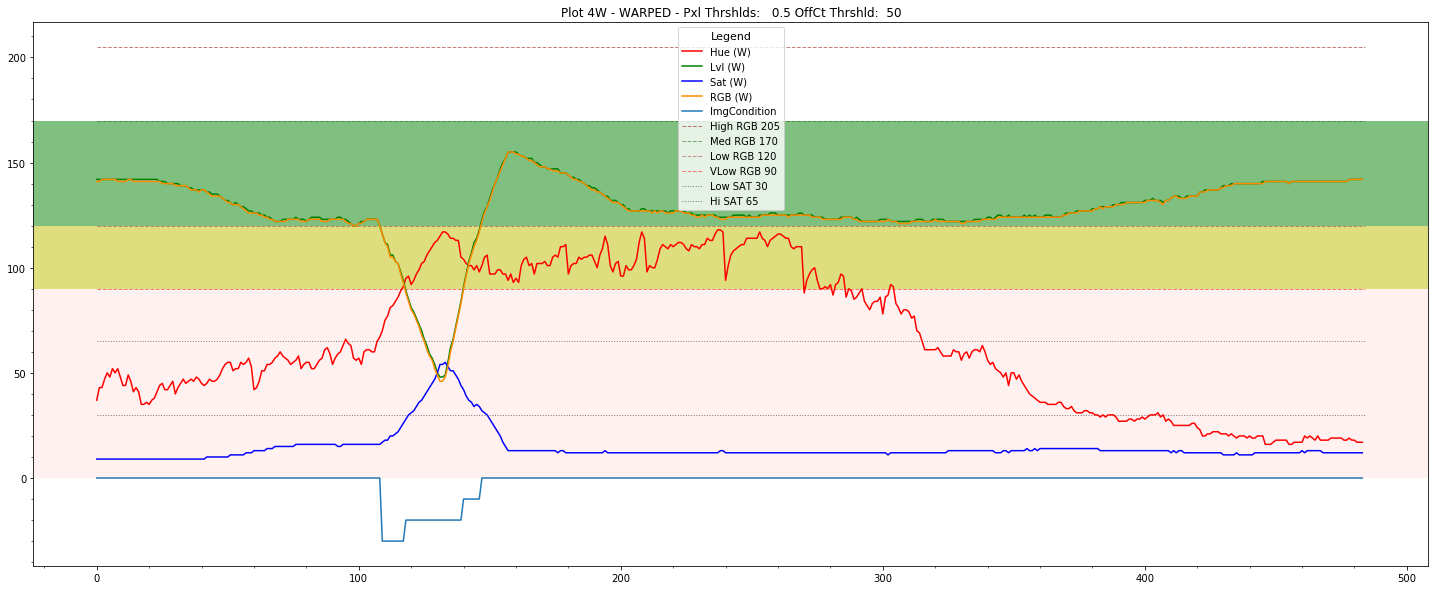

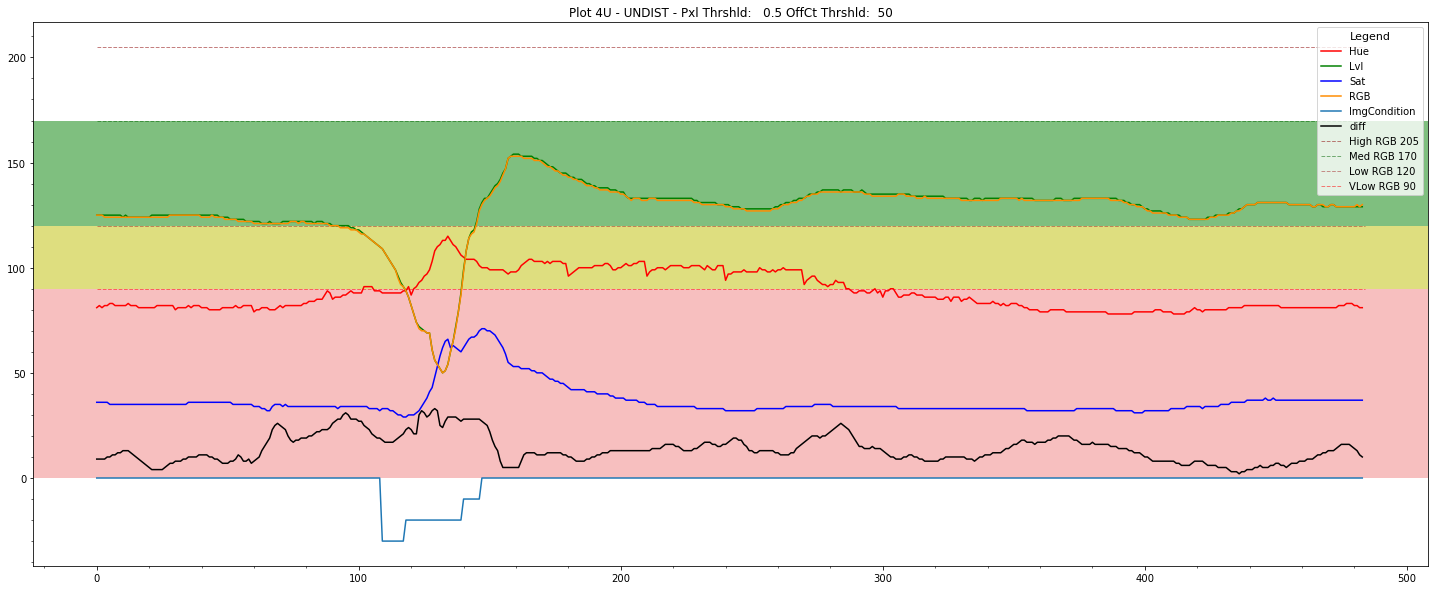

In [7]:
plot_4W(Pipeline, legend = 'best', size = (25,10), start = 0,  pxlthr = False)
plot_4U(Pipeline, legend = 'best', size = (25,10), start = 0)

3####  plot_5

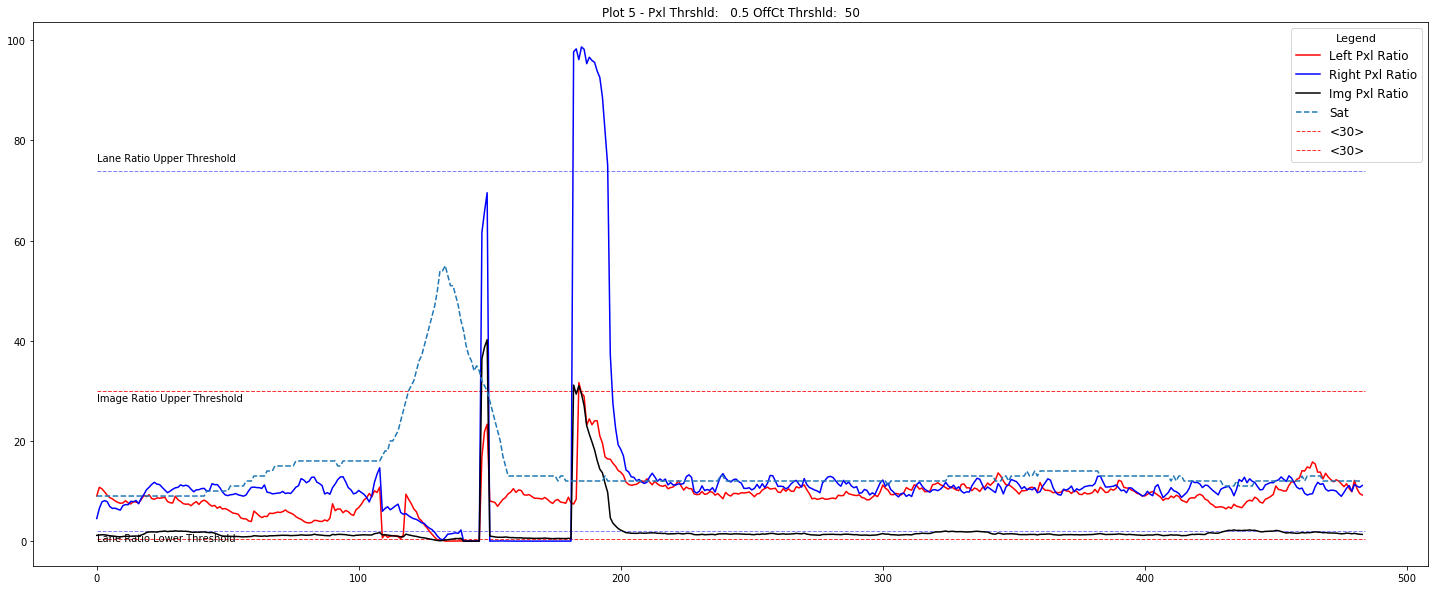

In [9]:
plot_5(Pipeline, legend = 'best', size= (25,10))

####  plot_6

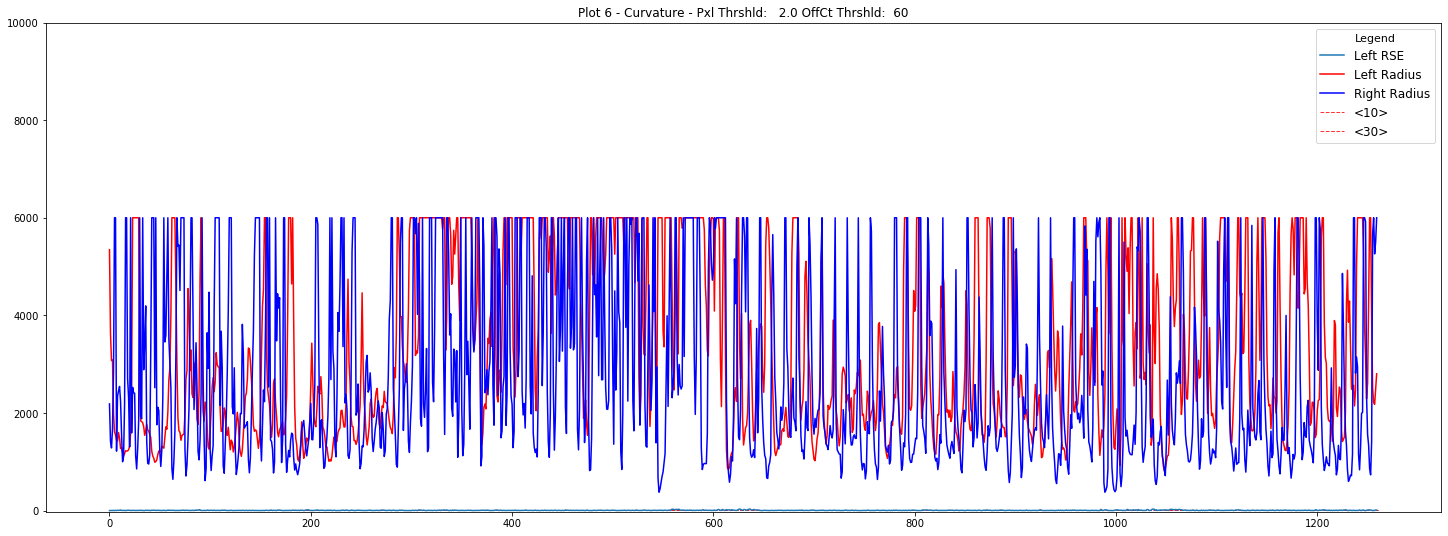

In [129]:
plot_6(Pipeline, size=(25,9) )

In [ ]:
np_format = {}
np_format['float'] = lambda x: "%8.2f" % x
np_format['int']   = lambda x: "%8d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =100, formatter = np_format)


In [ ]:
a = np.histogram(Pipeline.LeftLane.radius_history, bins = 10)
b = np.histogram(Pipeline.RightLane.radius_history, bins = 10)
print('  ',a[0], '\n', a[1])
print('',b[0], '\n', b[1])
# plt.hist(Pipeline.LeftLane.radius_history, bins=20, range=(0,100000) )

In [ ]:
Pipeline.LeftLane.radius_history  = np.clip(Pipeline.LeftLane.radius_history ,0, 6000).tolist()
Pipeline.RightLane.radius_history = np.clip(Pipeline.RightLane.radius_history,0, 6000).tolist()

In [ ]:
type(Pipeline.LeftLane.radius_history)

#### plot_2 

In [141]:
# len(Pipeline.acceptHistory)
# len(Pipeline.imgUndistStats['RGB'])

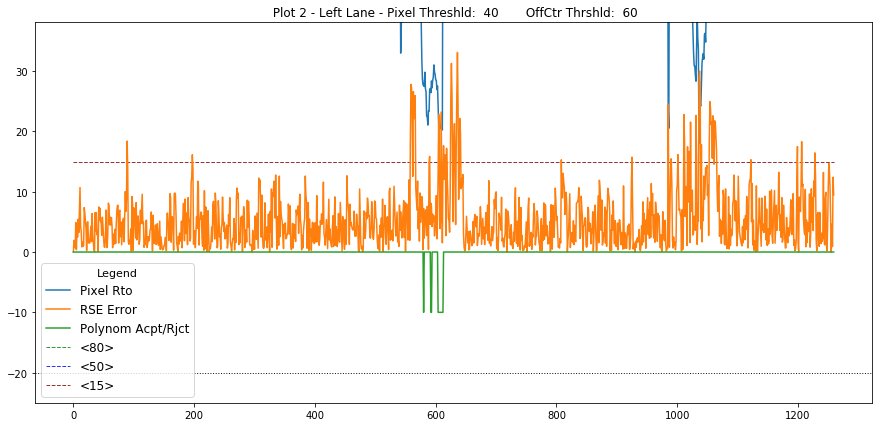

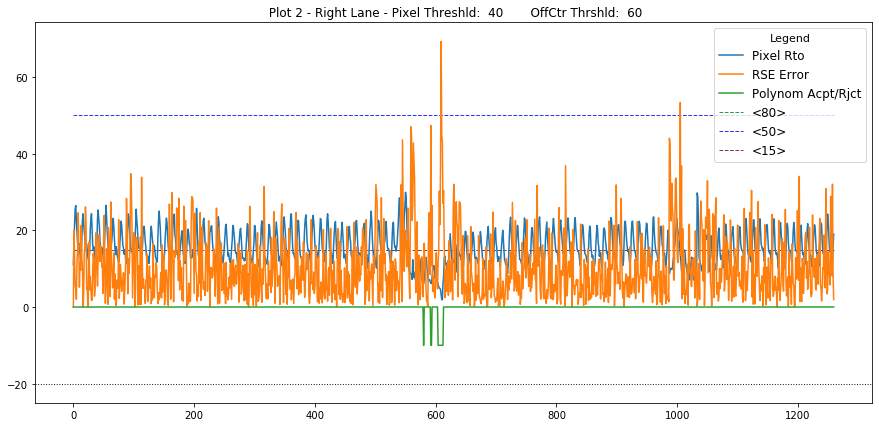

In [142]:
plot_2(Pipeline, Pipeline.LeftLane )
plot_2(Pipeline, Pipeline.RightLane)